# Обзор бизнес-показателей маркетплейса
- **Автор:** Алиса Гизова
- **Дата:** 13.01.2026

### Описание проекта
Проект реализуется в компании, которая успешно вышла на стабильную прибыльность в своей рыночной нише. Исторически управление строилось на оперативных бухгалтерских отчетах и экспертной оценке. С ростом масштабов бизнеса и сложности процессов возникла острая потребность перейти от реактивного учета к проактивному, data-driven управлению продуктом.

### Цели и задачи проекта

**Цель:**
Создать целостную систему анализа и ключевых метрик, которая позволит перевести понимание бизнеса с уровня «что продали» на уровень «почему растем/падаем» и «как развивать продукт осознанно».

**Задачи**:

1. Обзор ключевых метрик.
2. Оценка метрик монетизации и юнит-экономики.
3. Поиск инсайтов и точек роста. Сегментация и формулирование гипотез.
4. Подготовка эксперимента и подведение его итогов.


### Описание данных

### Таблица `Users`

| Поле              | Описание                                       |
|-------------------|------------------------------------------------|
| `user_id`         | Уникальный идентификатор пользователя.         |
| `registration_date` | Дата регистрации пользователя.                |
| `age`             | Возраст пользователя.                          |
| `gender`          | Пол.                                |
| `region`          | Регион.                                        |
| `acq_channel`     | Канал привлечения.                             |
| `buyer_segment`   | Сегмент покупателя.                            |
| `cohort_week`     | Неделя привлечения.|
| `cohort_month`    | Месяц привлечения. |

---

### Таблица `Events`

| Поле          | Описание                                                                 |
|---------------|--------------------------------------------------------------------------|
| `event_id`    | Уникальный идентификатор события.                                        |
| `user_id`     | Идентификатор пользователя.                                              |
| `event_date`  | Дата события.                                                            |
| `event_type`  | Тип события.   |
| `os`          | Операционная система.               |
| `device`      | Тип устройства.                                |
| `product_name`| Наименование товара, к которому относится событие (если применимо).      |
| `event_week`  | Неделя события.                                          |
| `event_month` | Месяц события .                                           |

---

### Таблица `Orders`

| Поле          | Описание                                                                 |
|---------------|--------------------------------------------------------------------------|
| `order_id`    | Уникальный идентификатор заказа.                                         |
| `user_id`     | Идентификатор пользователя, который сделал заказ |
| `order_date`  | Дата и время оформления заказа.                                          |
| `product_name`| Наименование товара.                                                     |
| `quantity`    | Количество единиц товара в заказе.                                       |
| `unit_price`  | Цена за одну единицу товара.                                             |
| `total_price` | Итоговая сумма заказа.                                                   |
| `category_name` | Наименование категории товара.                                         |
| `order_week`  | Неделя заказа.                                           |
| `order_month` | Месяц заказа.                                            |


### Таблица `Campaign_costs`

| Поле         | Описание                                                                 |
|--------------|--------------------------------------------------------------------------|
| `acq_channel`| Канал привлечения.  |
| `spend_month`| Месяц, в который был потрачен бюджет (отражает период, в котором были привлечены пользователи)                      |
| `budget`     | Маркетинговый бюджет (в денежном выражении), потраченный на данный канал в указанном месяце.                           |



### Описание событий

| Событие             | Описание                                                                                  |
|---------------------|-------------------------------------------------------------------------------------------|
| `page_view`         | Открытие любой страницы сайта или приложения пользователем.                                |
| `product_view`      | Просмотр страницы конкретного товара.                                                     |
| `product_click`     | Клик по товару (например, из списка товаров или на баннере).                              |
| `add_to_cart`       | Добавление товара в корзину.                                                              |
| `remove_from_cart`  | Удаление товара из корзины.                                                               |
| `search`            | Выполнение поиска по сайту или приложению.                                                |
| `filter_apply`      | Применение фильтра (например, по цене, бренду, категории).                                |
| `checkout_start`    | Начало оформления заказа (переход к оформлению корзины).                                  |
| `checkout_complete` | Завершение оформления заказа (не гарантирует покупку, покупка зависит от факта оплаты).                                          |
| `user_login`        | Вход пользователя в личный кабинет или аккаунт.                                           |
| `user_logout`       | Выход пользователя из аккаунта.                                                           |
| `wishlist_add`      | Добавление товара в список желаемого (wishlist).                                          |
| `category_view`     | Просмотр страницы категории товаров.                                                      |
| `banner_click`      | Клик по рекламному баннеру на сайте или в приложении.                                     |
| `promo_view`        | Просмотр промо-акции или специального предложения.                                        |


### Выручка маркетплейса = 5% от total_price

In [8]:
# Импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
import plotly.express as px
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.weightstats import ztest
from scipy import stats
import numpy as np
from scipy.stats import ttest_ind

## Загрузка данных и их предобработка

Проведем предобработку датафрейма `pa_marketplace_orders`.

In [12]:
# Выводим первые строки датафрейма на экран
pa_marketplace_orders.head()

order_id  user_id          order_date       product_name  quantity  \
0         1        3 2024-01-19 01:52:52         Шуруповерт         2   
1         2        3 2024-01-19 01:52:52  Молоток слесарный         1   
2         3        3 2024-01-19 01:52:52    Секатор садовый         2   
3         4        3 2024-01-25 13:59:38         Шуруповерт         2   
4         5        3 2024-01-25 13:59:38         Чай черный         1   

   unit_price  total_price                    category_name order_week  \
0     5539.13     11078.26  Инструменты и садовый инвентарь 2024-01-15   
1    11340.38     11340.38  Инструменты и садовый инвентарь 2024-01-15   
2    10892.09     21784.18  Инструменты и садовый инвентарь 2024-01-15   
3     5539.13     11078.26  Инструменты и садовый инвентарь 2024-01-22   
4     2099.59      2099.59                 Продукты питания 2024-01-22   

  order_month  
0  2024-01-01  
1  2024-01-01  
2  2024-01-01  
3  2024-01-01  
4  2024-01-01

In [13]:
# Выводим информацию о датафрейме
pa_marketplace_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31357 entries, 0 to 31356
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       31357 non-null  int64         
 1   user_id        31357 non-null  int64         
 2   order_date     31357 non-null  datetime64[ns]
 3   product_name   31357 non-null  object        
 4   quantity       31357 non-null  int64         
 5   unit_price     31357 non-null  float64       
 6   total_price    31357 non-null  float64       
 7   category_name  31357 non-null  object        
 8   order_week     31357 non-null  datetime64[ns]
 9   order_month    31357 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(2), int64(3), object(2)
memory usage: 2.4+ MB


In [14]:
# Проверяем полные дубликаты в датафрейме
pa_marketplace_orders.duplicated().sum()

0

---

Датасет `pa_marketplace_orders.csv` содержит 10 столбцов и 31357 строк.

После первичного анализа данных можно сделать следующие выводы:
- Названия столбцов соответствуют их содержимому и представлены в едином стиле.
- Представленные данные содержат числовые (`int64 ` и `float64`) и строковые значения (`object`). Значения в столбцах `order_date`, `order_week` и `order_month` содержат информацию о дате и времени и преобразованы к типу данных даты и времени `datetime64` на этапе выгрузки данных.
- Датасет не содержит пропусков.
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.
- В датафрейме нет полных дубликатов строк.

Проведем предобработку датафрейма `pa_marketplace_campaign_costs`.

In [17]:
# Выводим первые строки датафрейма на экран
pa_marketplace_campaign_costs.head()

acq_channel spend_month       budget
Unnamed: 0                                     
0            Affiliate  2024-01-01  179343.3875
1            Affiliate  2024-02-01  175488.4875
2            Affiliate  2024-03-01  164543.4750
3            Affiliate  2024-04-01  186869.9750
4            Affiliate  2024-05-01  166443.7750

In [18]:
# Выводим информацию о датафрейме
pa_marketplace_campaign_costs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88 entries, 0 to 87
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   acq_channel  88 non-null     object        
 1   spend_month  88 non-null     datetime64[ns]
 2   budget       88 non-null     float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 2.8+ KB


In [19]:
# Проверяем полные дубликаты в датафрейме
pa_marketplace_campaign_costs.duplicated().sum()

0

---

Датасет `pa_marketplace_campaign_costs.csv` содержит 3 столбца и 88 строк.

После первичного анализа данных можно сделать следующие выводы:
- Названия столбцов соответствуют их содержимому и представлены в едином стиле.
- Представленные данные содержат числовые (`float64`) и строковые значения (`object`). Значения в столбце `spend_month` содержат информацию о дате и времени и преобразованы к типу данных даты и времени `datetime64` на этапе выгрузки данных.
- Датасет не содержит пропусков.
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.
- В датафрейме нет полных дубликатов строк.

Проведем предобработку датафрейма `pa_marketplace_users`.

In [22]:
# Выводим первые строки датафрейма на экран
pa_marketplace_users.head()

user_id   registration_date  age gender           region      acq_channel  \
0        1 2024-01-01 00:47:00   35      M           Москва       Google Ads   
1        2 2024-01-01 19:01:00   53      M           Москва  Email Marketing   
2        3 2024-01-01 04:13:00   66      F  Санкт-Петербург       Google Ads   
3        4 2024-01-01 17:18:00   58      M        Краснодар        Affiliate   
4        5 2024-01-01 08:29:00   58      F   Другие регионы       Google Ads   

  buyer_segment cohort_week cohort_month  
0       regular  2024-01-01   2024-01-01  
1          rare  2024-01-01   2024-01-01  
2       regular  2024-01-01   2024-01-01  
3      one_time  2024-01-01   2024-01-01  
4       regular  2024-01-01   2024-01-01

In [23]:
# Выводим информацию о датафрейме
pa_marketplace_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44151 entries, 0 to 44150
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            44151 non-null  int64         
 1   registration_date  44151 non-null  datetime64[ns]
 2   age                44151 non-null  int64         
 3   gender             44151 non-null  object        
 4   region             44151 non-null  object        
 5   acq_channel        44151 non-null  object        
 6   buyer_segment      44151 non-null  object        
 7   cohort_week        44151 non-null  datetime64[ns]
 8   cohort_month       44151 non-null  datetime64[ns]
dtypes: datetime64[ns](3), int64(2), object(4)
memory usage: 3.0+ MB


In [24]:
# Проверяем полные дубликаты в датафрейме
pa_marketplace_users.duplicated().sum()

0

---

Датасет `pa_marketplace_users.csv` содержит 9 столбцов и 44151 строку.

После первичного анализа данных можно сделать следующие выводы:
- Названия столбцов соответствуют их содержимому и представлены в едином стиле.
- Представленные данные содержат числовые (`int64`) и строковые значения (`object`). Значения в столбце `spend_month` содержат информацию о дате и времени и преобразованы к типу данных даты и времени `datetime64` на этапе выгрузки данных.
- Датасет не содержит пропусков.
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.
- В датафрейме нет полных дубликатов строк.

Проведем предобработку датафрейма `pa_marketplace_events`.

In [27]:
# Выводим первые строки датафрейма на экран
pa_marketplace_events.head()

event_id  user_id event_date      event_type   os  device  \
0      3132      100 2024-01-01       page_view  iOS  mobile   
1      3133      100 2024-01-01    product_view  iOS  mobile   
2      3134      100 2024-01-01   product_click  iOS  mobile   
3      3135      100 2024-01-01     add_to_cart  iOS  mobile   
4      3136      100 2024-01-01  checkout_start  iOS  mobile   

           product_name event_week event_month  
0                   NaN 2024-01-01  2024-01-01  
1  Шорты для тренировок 2024-01-01  2024-01-01  
2        Куртка детская 2024-01-01  2024-01-01  
3  Балетки классические 2024-01-01  2024-01-01  
4                   NaN 2024-01-01  2024-01-01

In [28]:
# Выводим информацию о датафрейме
pa_marketplace_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785859 entries, 0 to 785858
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   event_id      785859 non-null  int64         
 1   user_id       785859 non-null  int64         
 2   event_date    785859 non-null  datetime64[ns]
 3   event_type    785859 non-null  object        
 4   os            785859 non-null  object        
 5   device        785859 non-null  object        
 6   product_name  385740 non-null  object        
 7   event_week    785859 non-null  datetime64[ns]
 8   event_month   785859 non-null  datetime64[ns]
dtypes: datetime64[ns](3), int64(2), object(4)
memory usage: 54.0+ MB


In [29]:
# Проверяем полные дубликаты в датафрейме
pa_marketplace_events.duplicated().sum()

0

---

Датасет `pa_marketplace_events.csv` содержит 9 столбцов и 785859 строк.

После первичного анализа данных можно сделать следующие выводы:
- Названия столбцов соответствуют их содержимому и представлены в едином стиле.
- Представленные данные содержат числовые (`int64`) и строковые значения (`object`). Значения в столбцах `event_date`, `event_week` и `event_month` содержат информацию о дате и времени и преобразованы к типу данных даты и времени `datetime64` на этапе выгрузки данных.
- Датасет содержит пропуски в столбце `product_name`. Это связано с тем, что есть события, не связанные с выбором продукта.
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.
- В датафрейме нет полных дубликатов строк.

## Обзор ключевых метрик

In [32]:
# Расчет метрик активности
# Создаем копию данных для безопасности
daily_analysis = pa_marketplace_events.copy()

# Группируем по дате и считаем метрики
daily_metrics = daily_analysis.groupby('event_date').agg(
    DAU=('user_id', 'nunique')
).reset_index()

weekly_metrics = daily_analysis.groupby('event_week').agg(
    WAU=('user_id', 'nunique')
).reset_index()

monthly_metrics = daily_analysis.groupby('event_month').agg(
    MAU=('user_id', 'nunique')
).reset_index()

# Каждой неделе нужно определить, к какому месяцу она относится
weekly_metrics['month'] = weekly_metrics['event_week'].dt.to_period('M')
monthly_metrics['month'] = monthly_metrics['event_month'].dt.to_period('M')

# Агрегируем WAU по месяцам для расчета Stickiness
monthly_summary = weekly_metrics.groupby('month').agg(
    avg_WAU=('WAU', 'mean')     # Среднее WAU за месяц
).reset_index()

# Объединяем с MAU
monthly_summary = monthly_summary.merge(
    monthly_metrics,
    on='month',
    how='left'
)

# Рассчитываем Stickiness (липкость)
monthly_summary['stickiness'] = monthly_summary['avg_WAU'] / monthly_summary['MAU']

monthly_summary['month'] = monthly_summary['month'].astype(str)

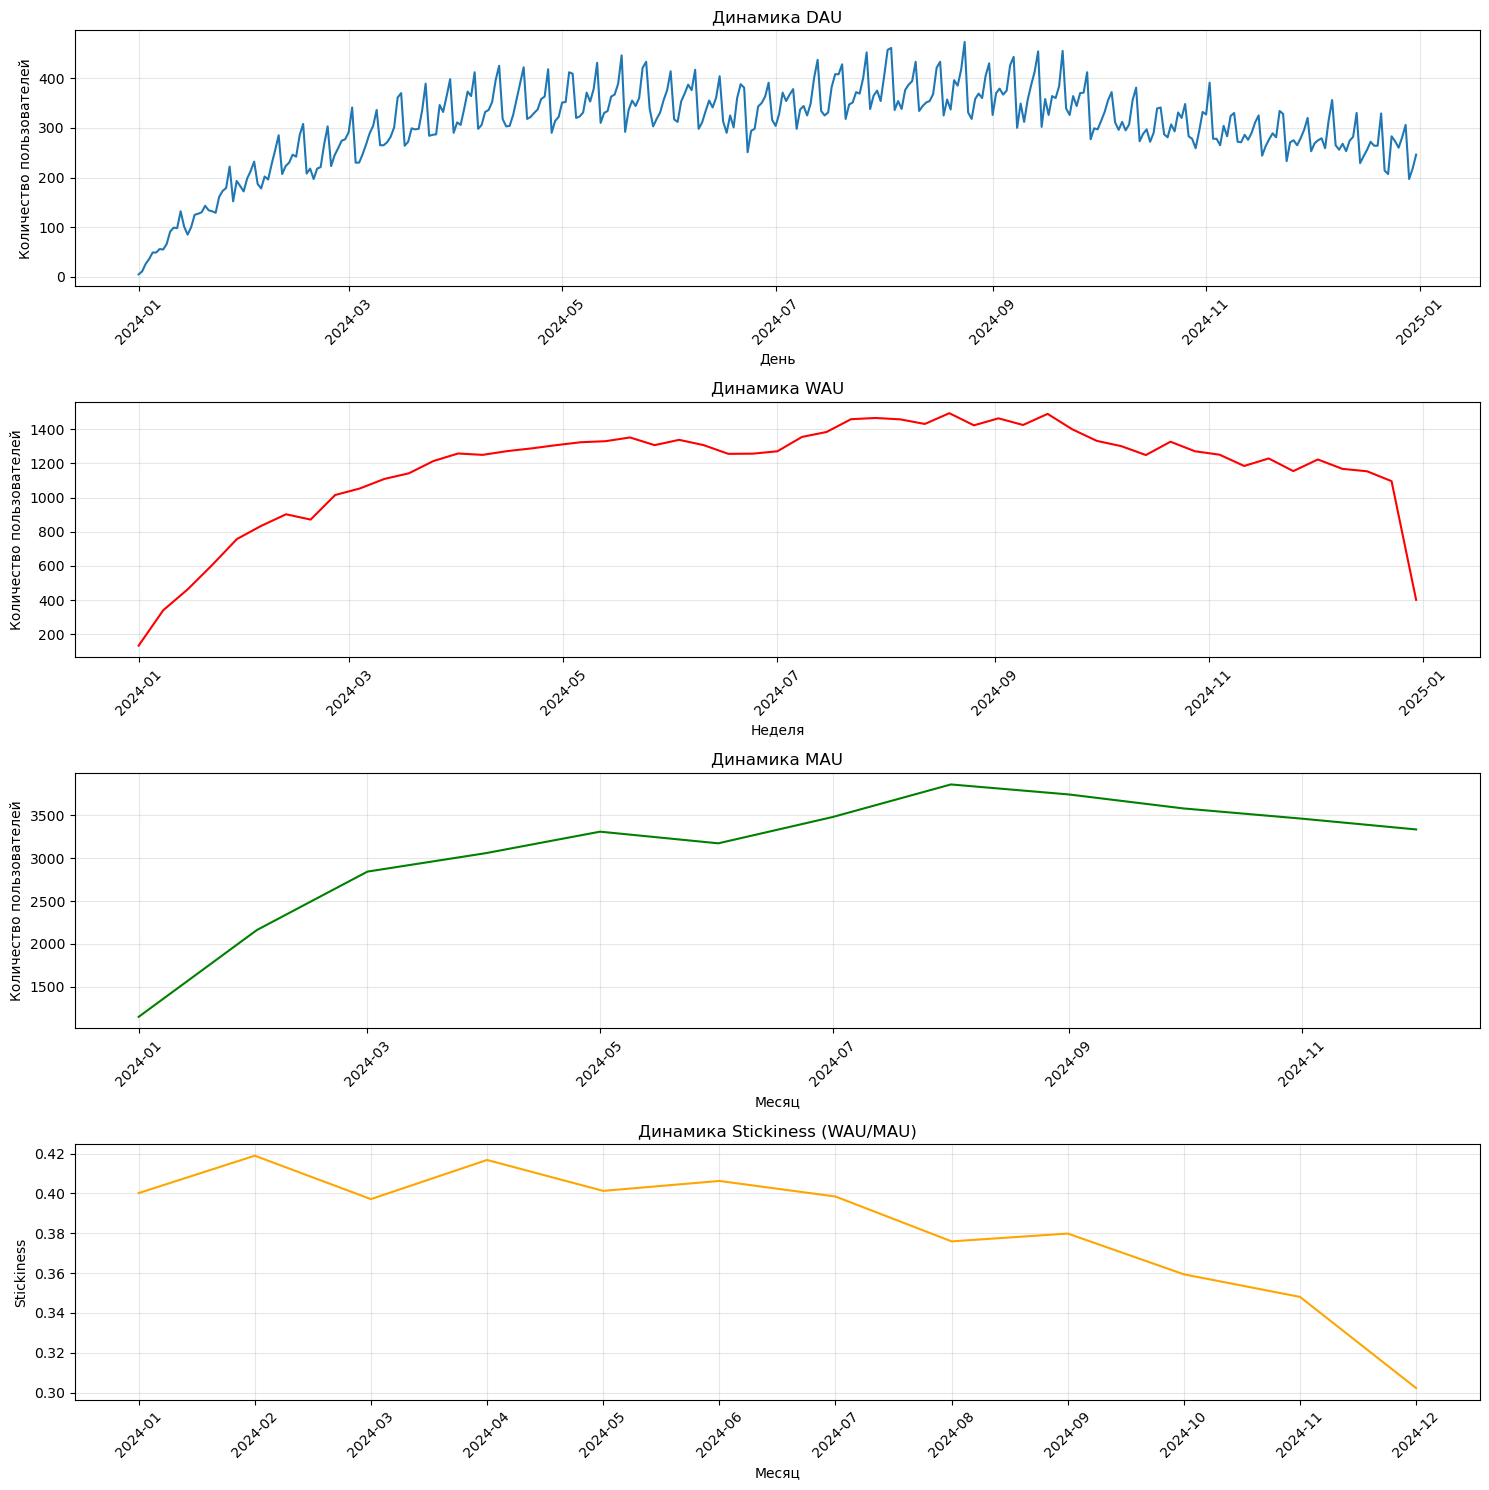

In [33]:
# Визуализация метрик активности
plt.figure(figsize=(15, 15))

# График 1: DAU
plt.subplot(4, 1, 1)
plt.plot(daily_metrics['event_date'], daily_metrics['DAU'], 
          linewidth=1.5)
plt.title('Динамика DAU')
plt.xlabel('День')
plt.ylabel('Количество пользователей')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# График 2: WAU
plt.subplot(4, 1, 2)
plt.plot(weekly_metrics['event_week'], weekly_metrics['WAU'], 
         linewidth=1.5,  color='red')
plt.title('Динамика WAU')
plt.xlabel('Неделя')
plt.ylabel('Количество пользователей')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# График 3: MAU
plt.subplot(4, 1, 3)
plt.plot(monthly_metrics['event_month'], monthly_metrics['MAU'], 
         linewidth=1.5,  color='green')
plt.title('Динамика MAU')
plt.xlabel('Месяц')
plt.ylabel('Количество пользователей')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# График 4: Stickiness
plt.subplot(4, 1, 4)
plt.plot(monthly_summary['month'], monthly_summary['stickiness'], 
         linewidth=1.5, color='orange')
plt.title('Динамика Stickiness (WAU/MAU)')
plt.xlabel('Месяц')
plt.ylabel('Stickiness')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**Промежуточный вывод:**

- Продукт демонстрирует стабильный рост MAU до середины 2024 года, после чего наблюдается медленное снижение. DAU и WAU показывают схожую тенденцию — рост до лета, затем умеренный спад.
- Stickiness (WAU/MAU) стабильно снижается с 0.42 до 0.30 к концу года — это тревожный знак: пользователи реже возвращаются, несмотря на рост базы.
- Продукт достиг плато и начал терять вовлечённость. Рост аудитории не компенсирует падение активности — нужна диагностика причин ухода и улучшение удержания.

In [35]:
# Создаем копии данных для безопасности
orders = pa_marketplace_orders.copy()
users = pa_marketplace_users.copy()
events = pa_marketplace_events.copy()

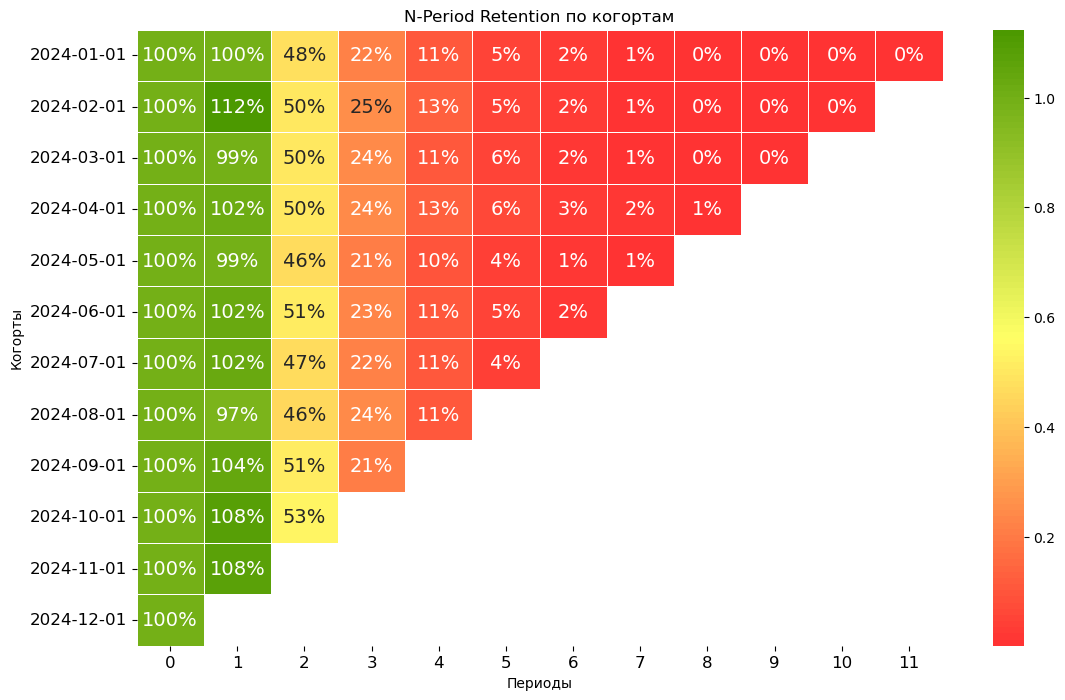

In [36]:
cmap = mcolors.LinearSegmentedColormap.from_list('green_red', ['#FF3333', '#FFFF66', '#4C9900'], N=100)

# Определяем когорту регистрации для каждого пользователя
cohort_map = users.set_index('user_id')['cohort_month'].to_dict()
events['cohort_month'] = events['user_id'].map(cohort_map)

# Фильтруем события после регистрации
events = events[events['event_month'] >= events['cohort_month']]

events['n_period'] = (events['event_month'].dt.to_period('M') - events['cohort_month'].dt.to_period('M')).apply(lambda x: x.n)

data_pivot = pd.pivot_table(events, values='user_id', index='cohort_month', columns='n_period', aggfunc=pd.Series.nunique)

data_pivot = data_pivot.div(data_pivot[0], axis=0)

data_pivot.index = pd.to_datetime(data_pivot.index).strftime('%Y-%m-%d')

plt.subplots(figsize=(13,8))

sns.heatmap(data_pivot, cmap=cmap,annot=True,
           fmt='.0%',
           linewidth=0.5,
           annot_kws={"size": 14})
plt.title('N-Period Retention по когортам')
plt.xlabel('Периоды')
plt.ylabel('Когорты')
plt.yticks(rotation=0)
plt.tick_params(labelsize=12) 
plt.show()

**Промежуточный вывод:**

- Удержание пользователей слабое — уже на третий месяц теряется более 50% пользователей, а к 4-му — около 75–80%. К концу шестого месяца удержание падает до 1–4%, что крайне низко для любого продукта.
- Несмотря на всплески >100% во втором месяце (вероятно, из-за дублей или технических артефактов), общая картина — быстрое «выгорание» пользователей.
- Проблема не в привлечении, а в удержании.

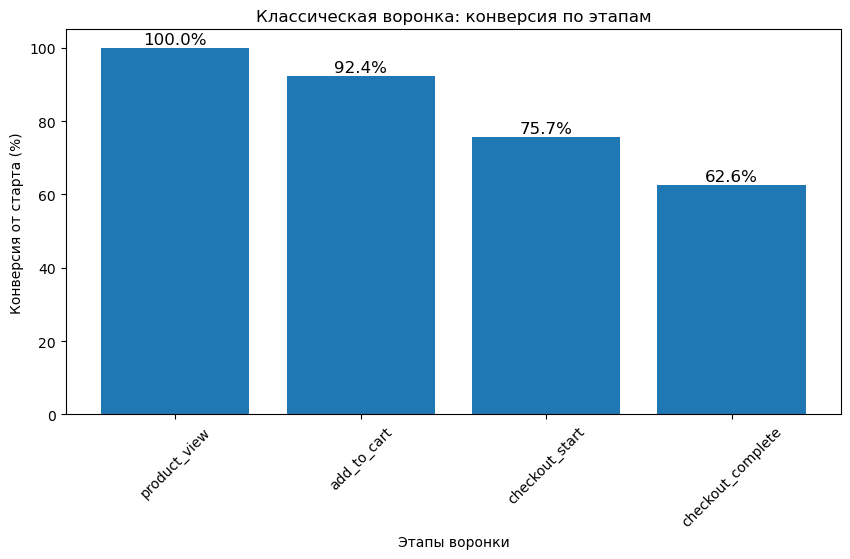

posx and posy should be finite values
posx and posy should be finite values


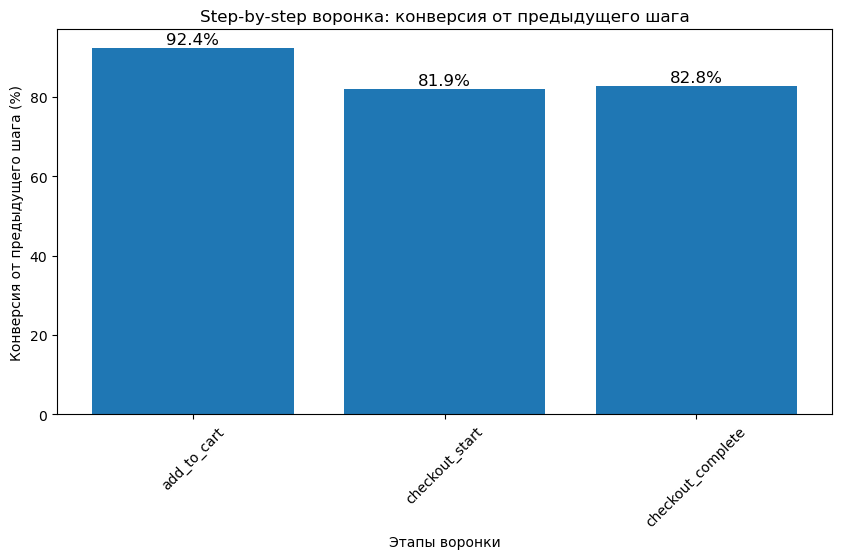

In [38]:
# Задаём порядок шагов в воронке
funnel_steps = ['product_view', 'add_to_cart', 'checkout_start', 'checkout_complete']

# Фильтруем датасет, оставляя только нужные шаги воронки
funnel_df_steps = events[events['event_type'].isin(funnel_steps)]
# Считаем число уникальных пользователей на каждом шаге
funnel_counts = funnel_df_steps.groupby('event_type')['user_id'].nunique().reindex(funnel_steps)

# Собираем таблицу воронки
funnel_df = pd.DataFrame({
   'step': funnel_steps,
   'users': funnel_counts.values
})

# Добавляем конверсии
funnel_df['conversion_from_first_%'] = (funnel_df['users'] / funnel_df['users'].iloc[0] * 100).round(1)
funnel_df['conversion_from_previous_%'] = (funnel_df['users'] / funnel_df['users'].shift(1) * 100).round(1)

# Визуализируем данные, кроме первого шага, чтобы не выводить NaN
plt.figure(figsize=(10, 5))
# Строим barplot
plt.bar(funnel_df['step'][0:], funnel_df['conversion_from_first_%'][0:])

steps = funnel_df['step'][0:]
conversions = funnel_df['conversion_from_first_%'][0:]

# Перебираем в цикле значения конверсии, которые мы только что отобразили
for index, value in enumerate(conversions):
    # Для каждого значения добавляем текст на график
    # index: координата X (0 для первого столбца, 1 для второго и т.д.)
    # value + 1: координата Y (высота столбца + небольшой отступ сверху)
    # f'{value:.1f}%': текст для отображения (значение с 1 знаком после запятой + '%')
    # ha='center': выравнивание текста по центру столбца
    plt.text(index, value + 1, f'{value:.1f}%', ha='center', fontsize=12, color='black')

plt.title('Классическая воронка: конверсия по этапам')
plt.ylabel('Конверсия от старта (%)')
plt.xlabel('Этапы воронки')
plt.xticks(rotation=45)
plt.show()

# Визуализируем данные, кроме первого шага, чтобы не выводить NaN
plt.figure(figsize=(10, 5))
# Строим barplot
plt.bar(funnel_df['step'][0:], funnel_df['conversion_from_previous_%'][0:])

steps = funnel_df['step'][0:]
conversions = funnel_df['conversion_from_previous_%'][0:]

# Перебираем в цикле значения конверсии, которые мы только что отобразили
for index, value in enumerate(conversions):
    # Для каждого значения добавляем текст на график
    # index: координата X (0 для первого столбца, 1 для второго и т.д.)
    # value + 1: координата Y (высота столбца + небольшой отступ сверху)
    # f'{value:.1f}%': текст для отображения (значение с 1 знаком после запятой + '%')
    # ha='center': выравнивание текста по центру столбца
    plt.text(index, value + 1, f'{value:.1f}%', ha='center', fontsize=12, color='black')

plt.title('Step-by-step воронка: конверсия от предыдущего шага')
plt.ylabel('Конверсия от предыдущего шага (%)')
plt.xlabel('Этапы воронки')
plt.xticks(rotation=45)
plt.show()

**Промежуточный вывод:**
- Основная утечка — на этапе checkout_start → checkout_complete (конверсия 82.8%), но это не главная проблема. Критичный срез — add_to_cart → checkout_start (всего 81.9%), что означает, что почти каждый пятый пользователь бросает корзину до оплаты.
- Общая конверсия в покупку с просмотра товара — 62.6%, что неплохо, но потенциал роста — в улучшении перехода из корзины в начало оплаты.
- Фокус на оптимизацию checkout-start — возможно, сложный интерфейс, скрытые платежи или отсутствие доверия.

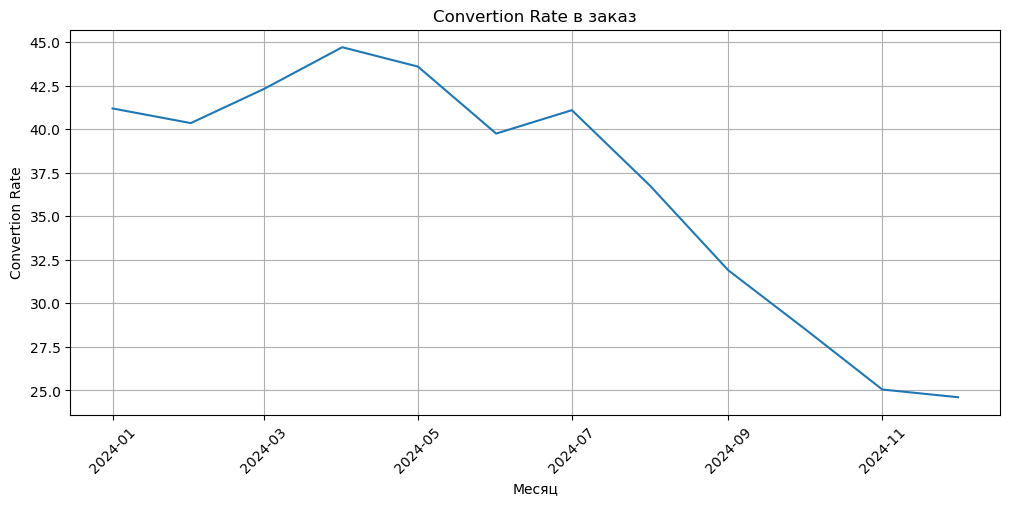

In [40]:
# CR от всех активных пользователей
monthly_orders = orders.groupby('order_month')['user_id'].nunique()
monthly_active = events.groupby('event_month')['user_id'].nunique()

cr_monthly = pd.DataFrame({
    'orders_count': monthly_orders,
    'active_users': monthly_active
}).fillna(0).reset_index()

cr_monthly = cr_monthly.rename(columns={'index': 'month'})

cr_monthly['CR_to_order'] = cr_monthly['orders_count'] / cr_monthly['active_users'] * 100

plt.figure(figsize=(12,5))
plt.plot(cr_monthly['month'], cr_monthly['CR_to_order'])
plt.title('Convertion Rate в заказ')
plt.xlabel('Месяц')
plt.ylabel('Convertion Rate')
plt.xticks(rotation=45)
plt.grid(True)
plt.show() 

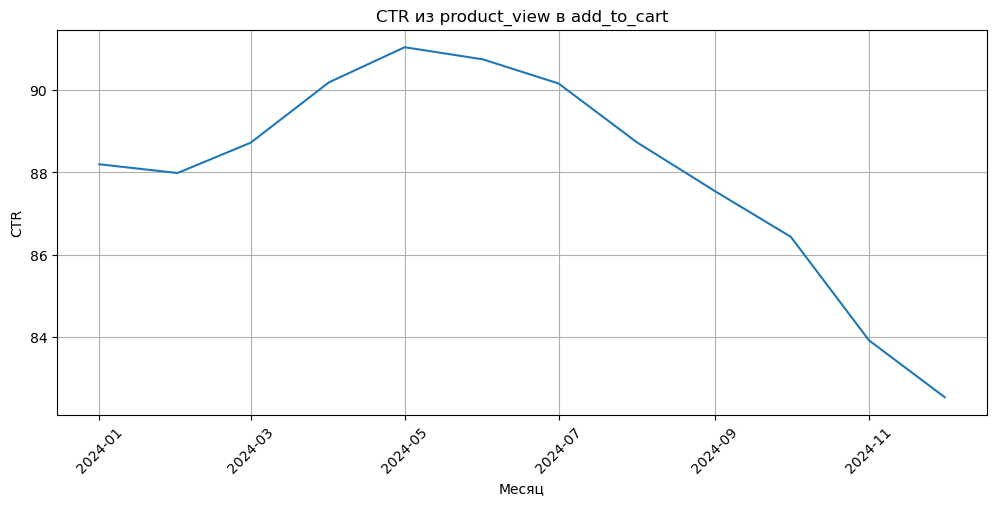

In [41]:
# CTR из product_view в add_to_cart
monthly_views = events[events['event_type'] == 'product_view'].groupby('event_month').size()
monthly_clicks = events[events['event_type'] == 'add_to_cart'].groupby('event_month').size()

ctr_data = pd.DataFrame({
    'views': monthly_views,
    'clicks': monthly_clicks
}).fillna(0).reset_index()

ctr_data['CTR'] = ctr_data['clicks'] / ctr_data['views'] * 100

plt.figure(figsize=(12,5))
plt.plot(ctr_data['event_month'], ctr_data['CTR'])
plt.title('CTR из product_view в add_to_cart')
plt.xlabel('Месяц')
plt.ylabel('CTR')
plt.xticks(rotation=45)
plt.grid(True)
plt.show() 

**Промежуточный вывод:**
- Обе метрики — CR в заказ и CTR из просмотра в корзину — демонстрируют устойчивое снижение с середины года. CR упал с 45% до 25%, CTR — с 90% до ~83%. Это не сезонность, а системный тренд.
- Продукт теряет эффективность на ключевых этапах — пользователи всё реже добавляют в корзину и оформляют заказы. Возможно, ухудшилась релевантность рекомендаций, выросла конкуренция или появились технические барьеры.

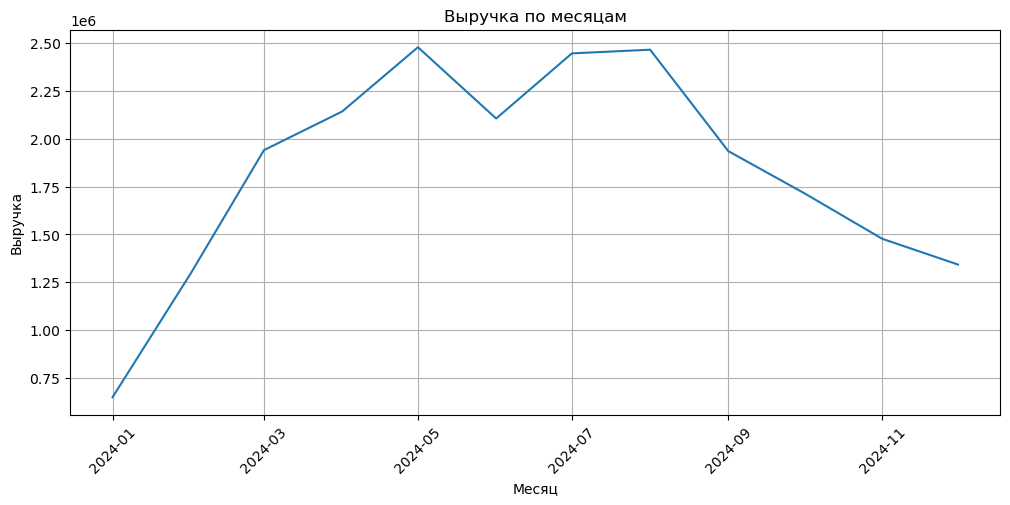

In [43]:
# Создаем копии данных для безопасности
orders = pa_marketplace_orders.copy()
events = pa_marketplace_events.copy()

# Выручка маркетплейса = 5% от total_price
orders['revenue'] = orders['total_price'] * 0.05

# Ежемесячная выручка
monthly_revenue = orders.groupby('order_month')['revenue'].sum().reset_index()

plt.figure(figsize=(12,5))
plt.plot(monthly_revenue['order_month'], monthly_revenue['revenue'])
plt.title('Выручка по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Выручка')
plt.xticks(rotation=45)
plt.grid(True)
plt.show() 

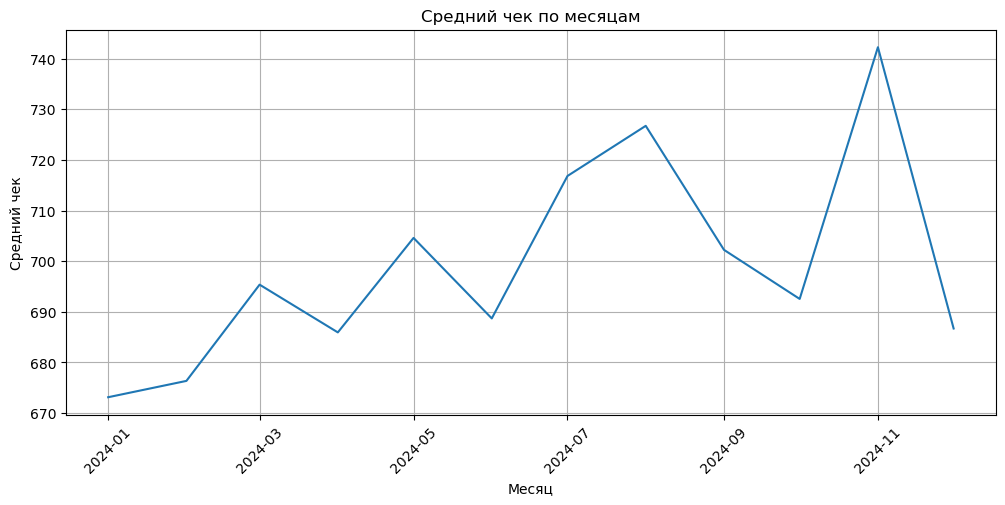

In [44]:
# Средний чек по месяцам
monthly_aov = orders.groupby('order_month')['revenue'].mean().reset_index()

plt.figure(figsize=(12,5))
plt.plot(monthly_aov['order_month'], monthly_aov['revenue'])
plt.title('Средний чек по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Средний чек')
plt.xticks(rotation=45)
plt.grid(True)
plt.show() 

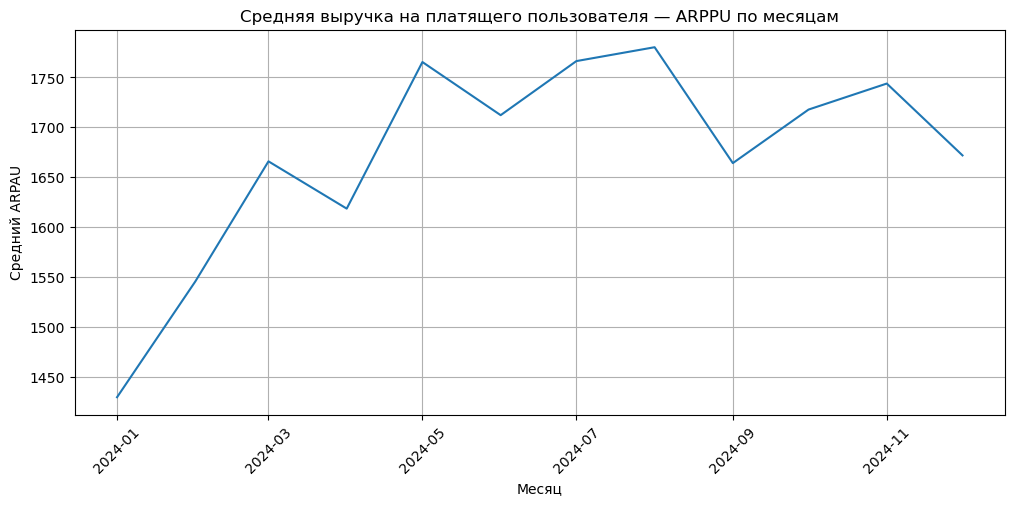

In [45]:
# Средняя выручка на платящего пользователя — ARPPU по месяцам
orders['dt'] = pd.to_datetime(orders['order_date']).dt.to_period('M').dt.to_timestamp()

orders_sum = orders.groupby(['user_id','dt'])['revenue'].sum().reset_index()

users_n = orders.groupby('dt')['user_id'].nunique().reset_index()
users_n = users_n.rename(columns={'user_id': 'users_count'})

merged_df = pd.merge(orders_sum , users_n, how = 'left', on = 'dt')

merged_df = merged_df.groupby('dt').agg(price=('revenue', 'sum'),
user_id=('users_count', 'min')).reset_index()

merged_df['ARPAU'] = merged_df['price']/merged_df['user_id']

plt.figure(figsize=(12,5))
plt.plot(merged_df['dt'], merged_df['ARPAU'])
plt.title('Средняя выручка на платящего пользователя — ARPPU по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Средний ARPAU')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

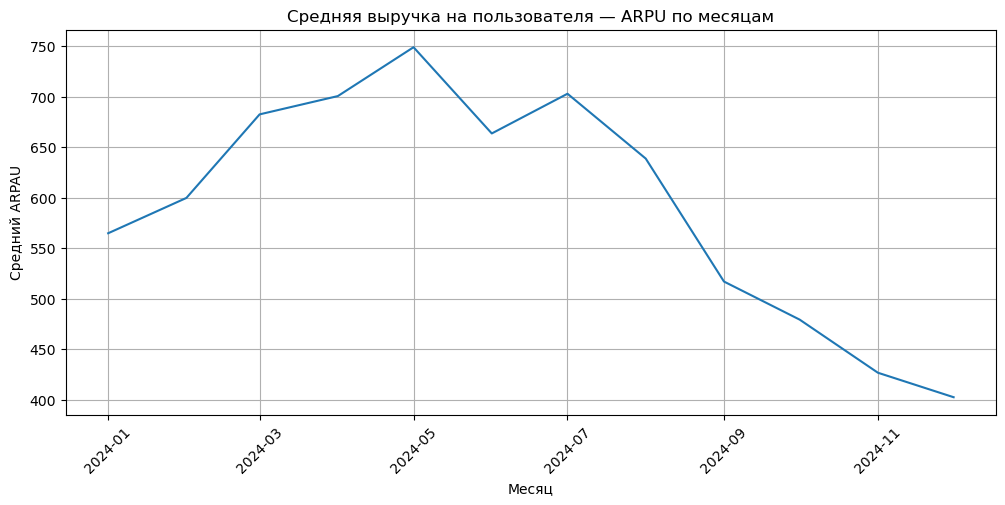

In [46]:
events['dt'] = pd.to_datetime(events['event_date']).dt.to_period('M').dt.to_timestamp()

users_n = events.groupby('dt')['user_id'].nunique().reset_index()
users_n = users_n.rename(columns={'user_id': 'users_count'})

merged_df = pd.merge(orders_sum , users_n, how = 'left', on = 'dt')

merged_df = merged_df.groupby('dt').agg(price=('revenue', 'sum'),
user_id=('users_count', 'min')).reset_index()

merged_df['ARPAU'] = merged_df['price']/merged_df['user_id']

plt.figure(figsize=(12,5))
plt.plot(merged_df['dt'], merged_df['ARPAU'])
plt.title('Средняя выручка на пользователя — ARPU по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Средний ARPAU')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**Промежуточный вывод:**
- Выручка росла до мая, затем стабилизировалась и начала падать — к декабрю упала на 40% от пика.
- Средний чек колеблется, но в ноябре — аномальный скачок до 740, затем резкое падение — возможно, техническая ошибка или единичные крупные заказы.
- ARPPU (доход с платящего) держится на уровне ~1700–1800, что хорошо — платящие пользователи не теряют ценность.
- ARPU (доход с любого пользователя) падает стремительно — с 750 в мае до 400 в декабре. Это главный тревожный сигнал: продукт привлекает больше бесплатных/неактивных пользователей, либо теряет платящих.
- Монетизация деградирует из-за падения ARPU — проблема не в ценности платящих, а в их доле и активности.

## Оценка метрик монетизации и юнит-экономики

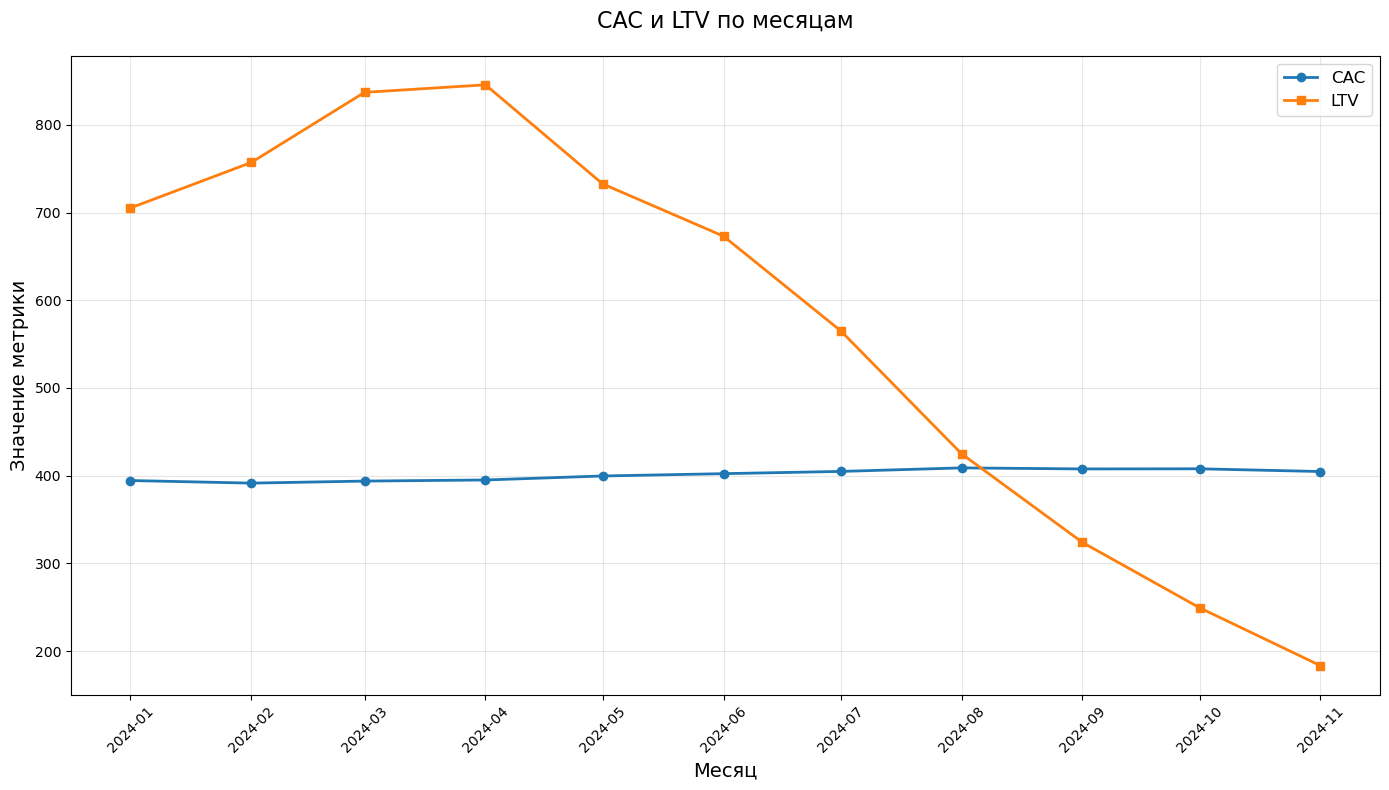

In [49]:
# Создаем копии данных для безопасности
users = pa_marketplace_users.copy()
events = pa_marketplace_events.copy()
campaign_costs = pa_marketplace_campaign_costs.copy()

# Суммарные расходы по месяцам
monthly_spend = campaign_costs.groupby('spend_month')['budget'].sum().reset_index()

# Новые пользователи по месяцам
monthly_new_users = users.groupby('cohort_month')['user_id'].count().reset_index()
monthly_new_users = monthly_new_users.rename(columns={
    'cohort_month': 'month',
    'user_id': 'new_users'
})

# Объединяем
cac_simple = pd.merge(
    monthly_spend,
    monthly_new_users,
    left_on='spend_month',
    right_on='month',
    how='inner'
)

# Удаляем последний месяц
cac_simple = cac_simple.sort_values('spend_month')
last_month = cac_simple['spend_month'].max()
cac_simple = cac_simple[cac_simple['spend_month'] < last_month]

# Считаем CAC
cac_simple['CAC'] = cac_simple['budget'] / cac_simple['new_users']

# Объединяем пользователей и заказы
simple_ltv = pd.merge(
    users[['user_id', 'cohort_month']],
    orders[['user_id', 'revenue']],
    on='user_id',
    how='left'
)

# Группируем по месяцам
monthly_ltv = simple_ltv.groupby('cohort_month').agg({
    'user_id': 'nunique',
    'revenue': 'sum'
}).reset_index()

monthly_ltv = monthly_ltv.rename(columns={
    'user_id': 'users_count',
    'revenue': 'total_revenue'
})

# Расчет LTV
monthly_ltv['LTV'] = monthly_ltv['total_revenue'] / monthly_ltv['users_count']

# Удаляем последний месяц
monthly_ltv = monthly_ltv.sort_values('cohort_month')
last_month = monthly_ltv['cohort_month'].max()
monthly_ltv = monthly_ltv[monthly_ltv['cohort_month'] < last_month]

# Визуализация CAC и LTV на одном графике
plt.figure(figsize=(14, 8))

# График CAC
plt.plot(pd.to_datetime(cac_simple['spend_month']), cac_simple['CAC'], 
         marker='o', linewidth=2, label='CAC')

# График LTV
plt.plot(pd.to_datetime(monthly_ltv['cohort_month']), monthly_ltv['LTV'], 
         marker='s', linewidth=2, label='LTV')

plt.title('CAC и LTV по месяцам', fontsize=16, pad=20)
plt.xlabel('Месяц', fontsize=14)
plt.ylabel('Значение метрики', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

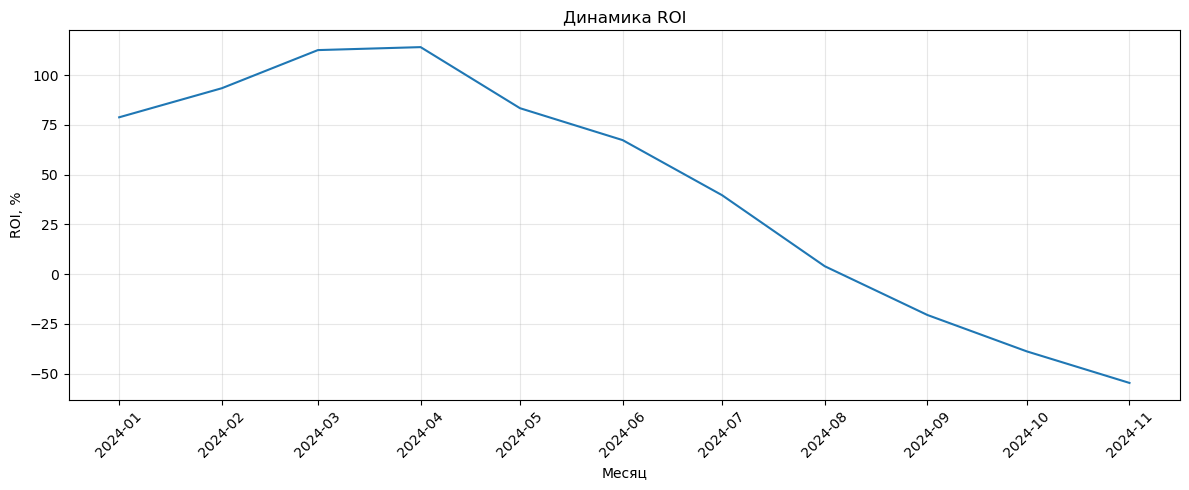

In [50]:
# Приводим даты к единому формату
cac_simple['spend_month'] = pd.to_datetime(cac_simple['spend_month'])
monthly_ltv['cohort_month'] = pd.to_datetime(monthly_ltv['cohort_month'])

# Объединяем CAC и LTV по месяцам
roi_analysis = pd.merge(
    cac_simple[['spend_month', 'CAC']],
    monthly_ltv[['cohort_month', 'LTV']],
    left_on='spend_month',
    right_on='cohort_month',
    how='inner'
)

# Расчет ROI
roi_analysis['ROI'] = (roi_analysis['LTV'] - roi_analysis['CAC']) / roi_analysis['CAC'] * 100

# Визуализация LTV по когортам
plt.figure(figsize=(12, 5))
plt.plot(roi_analysis['cohort_month'], roi_analysis['ROI'], linewidth=1.5)
plt.title('Динамика ROI')
plt.xlabel('Месяц')
plt.ylabel('ROI, %')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

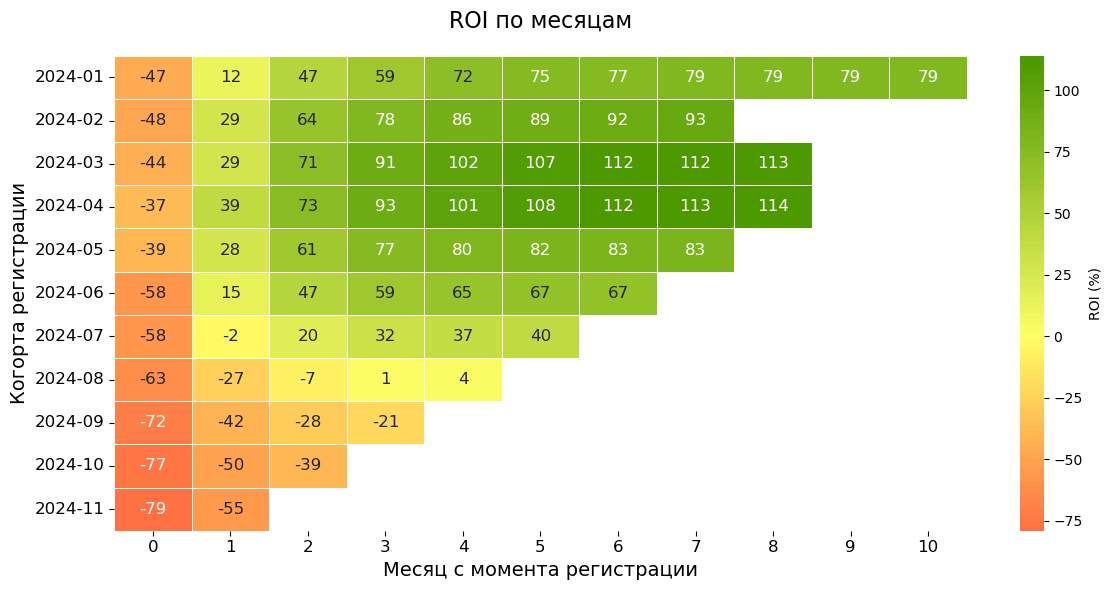

In [51]:
# Создаем цветовую карту
cmap = mcolors.LinearSegmentedColormap.from_list('green_red', ['#FF3333', '#FFFF66', '#4C9900'], N=100)

# Расчет CAC по когортам
# Подготовка данных
users['cohort_month'] = pd.to_datetime(users['cohort_month'])
campaign_costs['spend_month'] = pd.to_datetime(campaign_costs['spend_month'])

# Маркетинговые расходы по месяцам (CAC)
monthly_spend = campaign_costs.groupby('spend_month')['budget'].sum().reset_index()
monthly_new_users = users.groupby('cohort_month')['user_id'].nunique().reset_index()
monthly_new_users = monthly_new_users.rename(columns={'user_id': 'new_users'})

# Объединяем для расчета CAC
cac_by_cohort = pd.merge(
    monthly_spend,
    monthly_new_users,
    left_on='spend_month',
    right_on='cohort_month',
    how='inner'
)

# Удаляем последний месяц и рассчитываем CAC
if len(cac_by_cohort) > 0:
    cac_by_cohort = cac_by_cohort.sort_values('spend_month')
    last_month = cac_by_cohort['spend_month'].max()
    cac_by_cohort = cac_by_cohort[cac_by_cohort['spend_month'] < last_month]
    cac_by_cohort['CAC'] = cac_by_cohort['budget'] / cac_by_cohort['new_users']

# Расчет LTV по когортам
# Объединяем пользователей и заказы
users_orders = pd.merge(
    users[['user_id', 'cohort_month']],
    orders[['user_id', 'revenue']],
    on='user_id',
    how='left'
)

# Расчет LTV для каждой когорты по месяцам
cohort_analysis = pd.DataFrame()

for cohort_month in users['cohort_month'].dropna().unique():
    cohort_users = users_orders[users_orders['cohort_month'] == cohort_month]
    
    # Рассчитываем выручку по месяцам для этой когорты
    if len(cohort_users) > 0:
        # Находим все заказы пользователей этой когорты
        cohort_orders = orders[orders['user_id'].isin(cohort_users['user_id'])]
        
        if len(cohort_orders) > 0:
            
            # Группируем выручку по месяцам
            monthly_revenue = cohort_orders.groupby('order_month')['revenue'].sum().reset_index()
            
            # Рассчитываем накопленную выручку
            monthly_revenue = monthly_revenue.sort_values('order_month')
            monthly_revenue['cumulative_revenue'] = monthly_revenue['revenue'].cumsum()
            
            # Добавляем номер месяца с момента регистрации
            monthly_revenue['n_period'] = (monthly_revenue['order_month'].dt.to_period('M') - 
                                         pd.Period(cohort_month, freq='M')).apply(lambda x: x.n)

            # Добавляем информацию о когорте
            monthly_revenue['cohort_month'] = cohort_month
            monthly_revenue['users_count'] = len(cohort_users['user_id'].unique())
            monthly_revenue['LTV'] = monthly_revenue['cumulative_revenue'] / monthly_revenue['users_count']
            
            cohort_analysis = pd.concat([cohort_analysis, monthly_revenue])

# Расчет ROI по когортам и периодам
if len(cohort_analysis) > 0 and len(cac_by_cohort) > 0:
    # Объединяем с CAC
    roi_by_cohort = pd.merge(
        cohort_analysis,
        cac_by_cohort[['cohort_month', 'CAC']],
        on='cohort_month',
        how='left'
    )
    
    # Расчет ROI
    roi_by_cohort['ROI'] = (roi_by_cohort['LTV'] - roi_by_cohort['CAC']) / roi_by_cohort['CAC'] * 100
    
    # Создаем сводную таблицу для тепловой карты
    roi_pivot = roi_by_cohort.pivot_table(
        values='ROI',
        index='cohort_month',
        columns='n_period',
        aggfunc='mean'
    )
    
    # Форматируем индекс для лучшей читаемости
    roi_pivot.index = pd.to_datetime(roi_pivot.index).strftime('%Y-%m')
    
    # Построение тепловой карты
    plt.figure(figsize=(12, 6))
    
    sns.heatmap(roi_pivot, 
                cmap=cmap,
                annot=True,
                fmt='.0f',
                linewidth=0.5,
                annot_kws={"size": 12},
                center=0,
                cbar_kws={'label': 'ROI (%)'})
    
    plt.title('ROI по месяцам', fontsize=16, pad=20)
    plt.xlabel('Месяц с момента регистрации', fontsize=14)
    plt.ylabel('Когорта регистрации', fontsize=14)
    plt.yticks(rotation=0)
    plt.tick_params(labelsize=12)
    
    plt.tight_layout()
    plt.show()

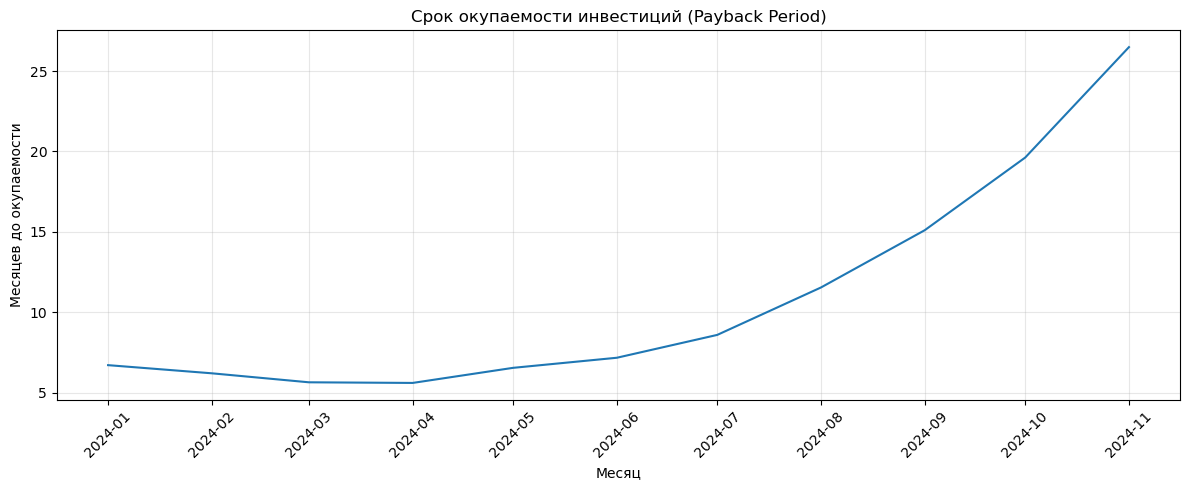

In [52]:
# Подготовка данных (используем ваши CAC и LTV)
cac_simple['spend_month'] = pd.to_datetime(cac_simple['spend_month'])
monthly_ltv['cohort_month'] = pd.to_datetime(monthly_ltv['cohort_month'])

# Объединяем данные
payback_data = pd.merge(
    cac_simple[['spend_month', 'CAC']],
    monthly_ltv[['cohort_month', 'LTV']],
    left_on='spend_month',
    right_on='cohort_month',
    how='inner'
)

# Расчет
payback_simple = payback_data[['spend_month', 'CAC', 'LTV']].copy()
payback_simple['payback_months'] = payback_simple['CAC'] / (payback_simple['LTV'] / 12)

# Визуализация
plt.figure(figsize=(12, 5))

# Линия Payback Period
plt.plot(payback_simple['spend_month'], payback_simple['payback_months'], 
        linewidth=1.5, label='Payback Period')

plt.title('Срок окупаемости инвестиций (Payback Period)')
plt.xlabel('Месяц')
plt.ylabel('Месяцев до окупаемости')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Промежуточнй вывод:**
- CAC vs LTV: CAC стабилен (~400), но LTV падает с 700 до 180 к декабрю → LTV < CAC с августа.

Вывод: продукт перестал окупать привлечение — инвестиции в маркетинг теперь убыточны.

- ROI: С марта — положительный (до +110%), но с июля — резко падает, к ноябрю — –50%.

Вывод: бизнес теряет деньги на каждом новом пользователе — срочная корректировка стратегии.

- ROI по когортам: Ранние когорты (январь–апрель) — высокий ROI (до 114%), но поздние (август–ноябрь) — отрицательный.

Вывод: проблема не в старых пользователях, а в новых — они хуже конвертируются и не возвращаются.

- Payback Period: Срок окупаемости вырос с 6 до 26 месяцев — неприемлемо для любого бизнеса.

Вывод: модель масштабирования сломана — нужно срочно снижать CAC или повышать LTV.

**Выводы по этапам 2 и 3**

**Этап 2: Обзор ключевых метрик**

- **Аудитория растёт, но теряет активность:** MAU стабилен, но DAU/WAU и Stickiness падают — пользователи реже возвращаются.
- **Удержание критически низкое:** >75% уходят уже на 3-й месяц, к 6-му месяцу — почти все. Проблема не в привлечении, а в удержании.
- **Воронка работает, но с утечками:** Основная потеря — между «корзина» и «начало оплаты» (81.9%). Конверсия в заказ — 62.6%, но снижается.

**Этап 3: Монетизация и юнит-экономика**
  
- **Выручка падает** — с пика 2.5M до 1.3M за год. ARPU обвалился с 750 до 400 — продукт привлекает дешёвых/неактивных пользователей.
- **ARPPU стабилен (~1700)** — платящие не теряют ценность, но их доля падает.
- **Юнит-экономика в красной зоне:**
    - LTV < CAC с августа → ROI отрицательный (–50% к ноябрю).
    - Payback Period вырос с 6 до 26 месяцев — инвестиции не окупаются.
    - Все новые когорты (август–ноябрь) — убыточны.

**Итог:** Продукт в кризисе юнит-экономики — рост аудитории не компенсирует падение активности, монетизации и экономики. Без срочных мер — убыточность и потеря масштаба.

## Поиск инсайтов, точек роста и сегментация

**Сегментация по каналам привлечения**

Найдено каналов привлечения: 6
Каналы: ['Affiliate', 'TikTok', 'Google Ads', 'SEO', 'Email Marketing', 'Social Media']


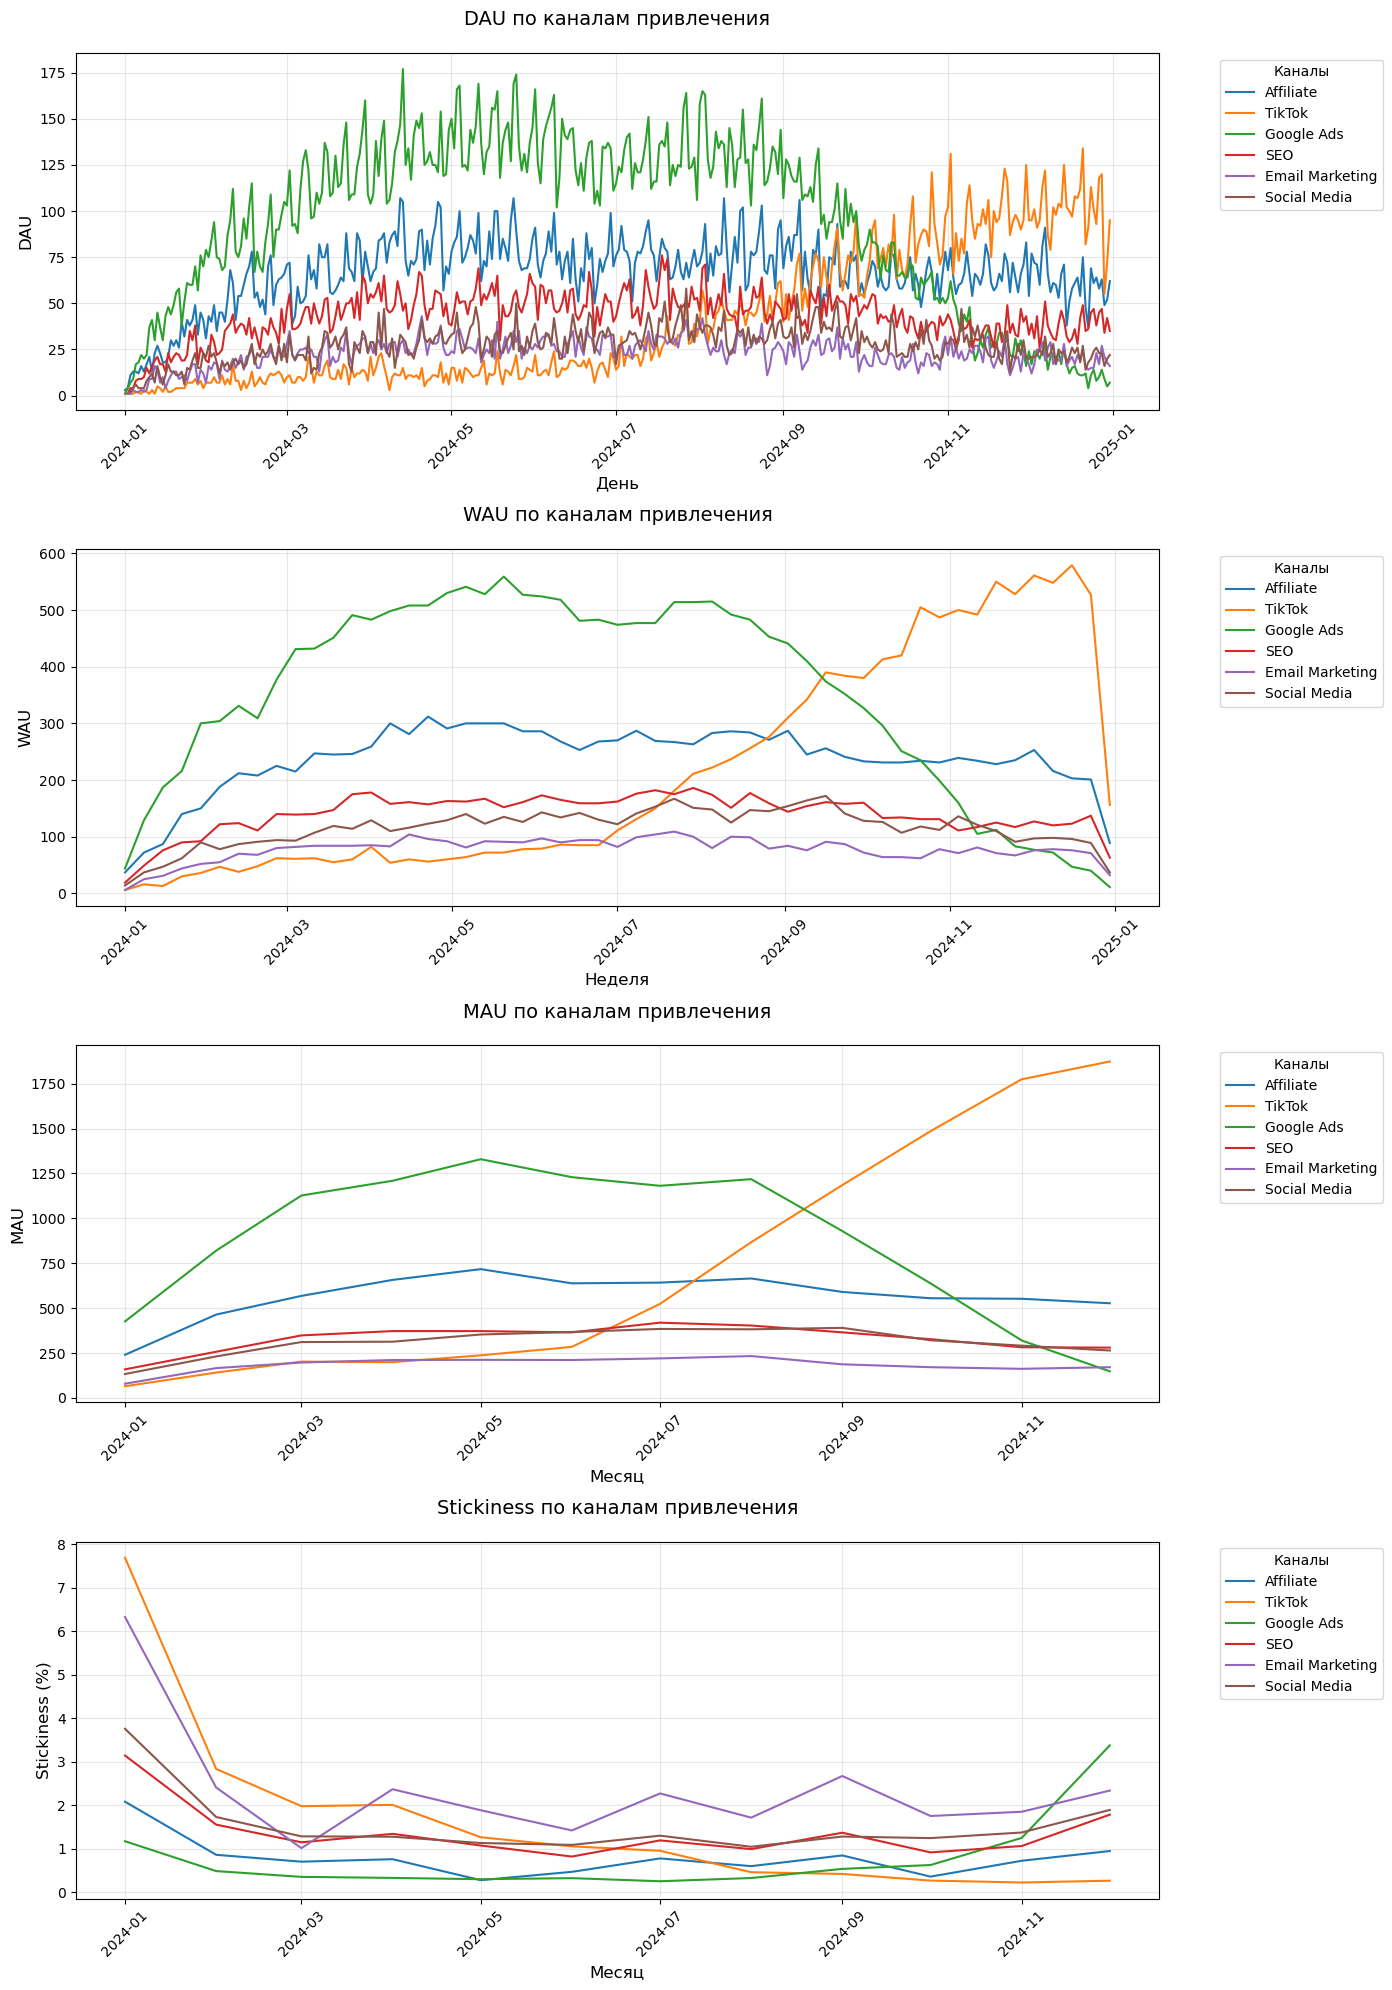

In [58]:
# Подготовка данных - добавляем канал привлечения к событиям
events['acq_channel'] = events['user_id'].map(users.set_index('user_id')['acq_channel'])
events_with_channel = events.dropna(subset=['acq_channel'])

# Получаем уникальные каналы
channels = events_with_channel['acq_channel'].dropna().unique()
print(f"Найдено каналов привлечения: {len(channels)}")
print("Каналы:", list(channels))

# DAU по каналам (Daily Active Users)
daily_metrics_by_channel = events_with_channel.groupby(['event_date', 'acq_channel'])['user_id'].nunique().reset_index()
daily_metrics_by_channel = daily_metrics_by_channel.rename(columns={'user_id': 'DAU'})

# WAU по каналам (Weekly Active Users)
weekly_metrics_by_channel = events_with_channel.groupby(['event_week', 'acq_channel'])['user_id'].nunique().reset_index()
weekly_metrics_by_channel = weekly_metrics_by_channel.rename(columns={'user_id': 'WAU'})

# MAU по каналам (Monthly Active Users)
monthly_metrics_by_channel = events_with_channel.groupby(['event_month', 'acq_channel'])['user_id'].nunique().reset_index()
monthly_metrics_by_channel = monthly_metrics_by_channel.rename(columns={'user_id': 'MAU'})

# Каждой неделе нужно определить, к какому месяцу она относится
weekly_metrics_by_channel['month'] = weekly_metrics_by_channel['event_week'].dt.to_period('M')
monthly_metrics_by_channel['month'] = monthly_metrics_by_channel['event_month'].dt.to_period('M')

# Stickiness по каналам (WAU/MAU)
# Для этого нужно агрегировать WAU на уровне месяца
monthly_avg_wau = weekly_metrics_by_channel.groupby(['month', 'acq_channel'])['WAU'].nunique().reset_index()
monthly_avg_wau = monthly_avg_wau.rename(columns={'WAU': 'avg_WAU'})

# Объединяем MAU и средний WAU для расчета Stickiness
monthly_summary_by_channel = pd.merge(
    monthly_metrics_by_channel,
    monthly_avg_wau,
    on=['month', 'acq_channel'],
    how='left'
)

monthly_summary_by_channel['stickiness'] = (monthly_summary_by_channel['avg_WAU'] / monthly_summary_by_channel['MAU']) * 100

# Визуализация метрик активности в одном столбце
plt.figure(figsize=(14, 20))

# График 1: DAU по каналам
plt.subplot(4, 1, 1)
for idx, channel in enumerate(channels):
    daily_channel = daily_metrics_by_channel[daily_metrics_by_channel['acq_channel'] == channel]
    plt.plot(daily_channel['event_date'], daily_channel['DAU'], 
             linewidth=1.5, label=channel)
plt.title('DAU по каналам привлечения', fontsize=14, pad=20)
plt.xlabel('День', fontsize=12)
plt.ylabel('DAU', fontsize=12)
plt.legend(title='Каналы', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout(pad=3.0)

# График 2: WAU по каналам
plt.subplot(4, 1, 2)
for idx, channel in enumerate(channels):
    weekly_channel = weekly_metrics_by_channel[weekly_metrics_by_channel['acq_channel'] == channel]
    plt.plot(weekly_channel['event_week'], weekly_channel['WAU'], 
             linewidth=1.5, label=channel)
plt.title('WAU по каналам привлечения', fontsize=14, pad=20)
plt.xlabel('Неделя', fontsize=12)
plt.ylabel('WAU', fontsize=12)
plt.legend(title='Каналы', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout(pad=3.0)

# График 3: MAU по каналам
plt.subplot(4, 1, 3)
for idx, channel in enumerate(channels):
    monthly_channel = monthly_metrics_by_channel[monthly_metrics_by_channel['acq_channel'] == channel]
    plt.plot(monthly_channel['event_month'], monthly_channel['MAU'], 
             linewidth=1.5, label=channel)
plt.title('MAU по каналам привлечения', fontsize=14, pad=20)
plt.xlabel('Месяц', fontsize=12)
plt.ylabel('MAU', fontsize=12)
plt.legend(title='Каналы', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout(pad=3.0)

# График 4: Stickiness по каналам
plt.subplot(4, 1, 4)
for idx, channel in enumerate(channels):
    stickiness_channel = monthly_summary_by_channel[monthly_summary_by_channel['acq_channel'] == channel]
    if len(stickiness_channel) > 0:
        plt.plot(stickiness_channel['event_month'], stickiness_channel['stickiness'], 
                 linewidth=1.5, label=channel)
plt.title('Stickiness по каналам привлечения', fontsize=14, pad=20)
plt.xlabel('Месяц', fontsize=12)
plt.ylabel('Stickiness (%)', fontsize=12)
plt.legend(title='Каналы', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**Промежуточный вывод:**

- Google Ads — лидер по MAU/DAU в первой половине года, но к концу резко падает до нуля → соответствует уходу Google Ads с российского рынка (май–июнь 2024).
- TikTok — взрывной рост MAU и WAU во второй половине года (особенно с сентября), но Stickiness ниже 1% → привлекает много, но не удерживает.
- Affiliate — стабильный, умеренный трафик, Stickiness ~0.5–1% → надёжный, но не масштабируемый канал.
- Email Marketing — низкий трафик, но высокий Stickiness (до 2–3%) → лучший канал по удержанию.
- SEO — стабильный, умеренный поток, Stickiness ~1% → долгосрочный, качественный трафик.
- Social Media — слабый результат по всем метрикам.

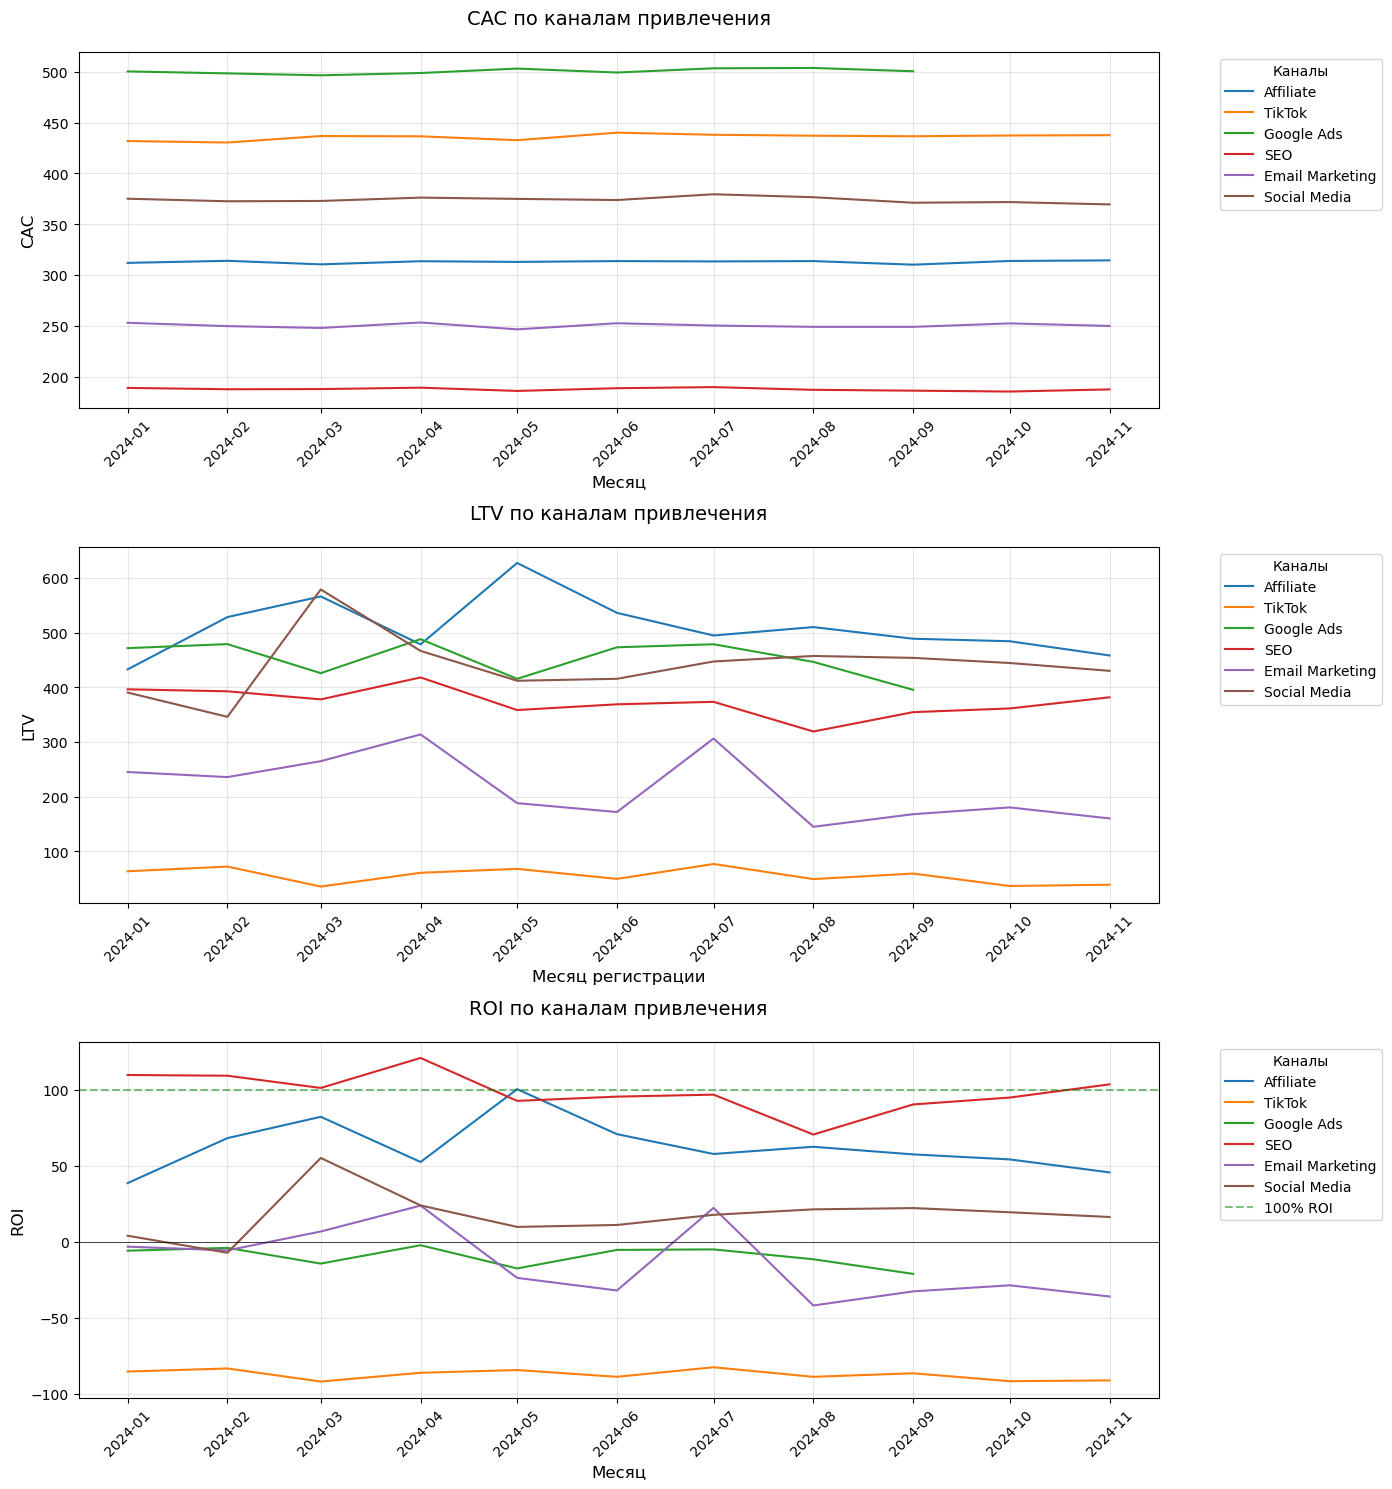

In [60]:
# Подготовка данных - добавляем канал привлечения
orders['acq_channel'] = orders['user_id'].map(users.set_index('user_id')['acq_channel'])
users['cohort_month'] = pd.to_datetime(users['cohort_month'])
campaign_costs['spend_month'] = pd.to_datetime(campaign_costs['spend_month'])

# Для каждого канала будем хранить временные ряды
cac_by_channel = {}
ltv_by_channel = {}
roi_by_channel = {}

# Проходим по всем каналам
for channel in channels:
    # CAC по месяцам для канала
    # Маркетинговые расходы по месяцам для канала
    monthly_spend_channel = campaign_costs[campaign_costs['acq_channel'] == channel].groupby('spend_month')['budget'].sum().reset_index()
    
    # Новые пользователи по месяцам для канала
    monthly_new_users_channel = users[users['acq_channel'] == channel].groupby('cohort_month')['user_id'].nunique().reset_index()
    monthly_new_users_channel = monthly_new_users_channel.rename(columns={'user_id': 'new_users'})
    
    # Объединяем
    cac_channel = pd.merge(
        monthly_spend_channel,
        monthly_new_users_channel,
        left_on='spend_month',
        right_on='cohort_month',
        how='inner'
    )
    
    # Удаляем последний месяц и рассчитываем CAC
    if len(cac_channel) > 0:
        cac_channel = cac_channel.sort_values('spend_month')
        last_month = cac_channel['spend_month'].max()
        cac_channel = cac_channel[cac_channel['spend_month'] < last_month]
        cac_channel['CAC'] = cac_channel['budget'] / cac_channel['new_users']
        
        # Сохраняем данные
        cac_by_channel[channel] = cac_channel
    
    # LTV по месяцам для канала
    # Объединяем пользователей и заказы для канала
    users_channel = users[users['acq_channel'] == channel][['user_id', 'cohort_month']]
    orders_channel = orders[orders['acq_channel'] == channel][['user_id', 'revenue']]
    
    simple_ltv_channel = pd.merge(
        users_channel,
        orders_channel,
        on='user_id',
        how='left'
    )
    
    # Группируем по месяцам
    monthly_ltv_channel = simple_ltv_channel.groupby('cohort_month').agg({
        'user_id': 'count',
        'revenue': 'sum'
    }).reset_index()
    
    monthly_ltv_channel = monthly_ltv_channel.rename(columns={
        'user_id': 'users_count',
        'revenue': 'total_revenue'
    })
    
    # Расчет LTV и удаление последнего месяца
    if len(monthly_ltv_channel) > 0:
        monthly_ltv_channel['LTV'] = monthly_ltv_channel['total_revenue'] / monthly_ltv_channel['users_count']
        monthly_ltv_channel = monthly_ltv_channel.sort_values('cohort_month')
        last_month = monthly_ltv_channel['cohort_month'].max()
        monthly_ltv_channel = monthly_ltv_channel[monthly_ltv_channel['cohort_month'] < last_month]
        
        # Сохраняем данные
        ltv_by_channel[channel] = monthly_ltv_channel
    
    # ROI по месяцам для канала
    # Объединяем CAC и LTV для расчета ROI
    if channel in cac_by_channel and channel in ltv_by_channel:
        roi_channel = pd.merge(
            cac_by_channel[channel][['spend_month', 'CAC']],
            ltv_by_channel[channel][['cohort_month', 'LTV']],
            left_on='spend_month',
            right_on='cohort_month',
            how='inner'
        )
        
        if len(roi_channel) > 0:
            roi_channel['ROI'] = (roi_channel['LTV'] - roi_channel['CAC']) / roi_channel['CAC'] * 100
            roi_by_channel[channel] = roi_channel

# Визуализация метрик монетизации в одном столбце
plt.figure(figsize=(14, 15))

# График 1: CAC по каналам
plt.subplot(3, 1, 1)
for channel in channels:
    if channel in cac_by_channel and len(cac_by_channel[channel]) > 0:
        channel_data = cac_by_channel[channel]
        plt.plot(channel_data['spend_month'], channel_data['CAC'], 
                linewidth=1.5, label=channel)
        
plt.title('CAC по каналам привлечения', fontsize=14, pad=20)
plt.xlabel('Месяц', fontsize=12)
plt.ylabel('CAC', fontsize=12)
plt.legend(title='Каналы', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout(pad=3.0)

# График 2: LTV по каналам
plt.subplot(3, 1, 2)
for channel in channels:
    if channel in ltv_by_channel and len(ltv_by_channel[channel]) > 0:
        channel_data = ltv_by_channel[channel]
        plt.plot(channel_data['cohort_month'], channel_data['LTV'], 
                linewidth=1.5, label=channel)
        
plt.title('LTV по каналам привлечения', fontsize=14, pad=20)
plt.xlabel('Месяц регистрации', fontsize=12)
plt.ylabel('LTV', fontsize=12)
plt.legend(title='Каналы', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout(pad=3.0)

# График 3: ROI по каналам
plt.subplot(3, 1, 3)
for channel in channels:
    if channel in roi_by_channel and len(roi_by_channel[channel]) > 0:
        channel_data = roi_by_channel[channel]
        plt.plot(channel_data['spend_month'], channel_data['ROI'], 
                linewidth=1.5, label=channel)
        
plt.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
plt.axhline(y=100, color='green', linestyle='--', alpha=0.5, label='100% ROI')
plt.title('ROI по каналам привлечения', fontsize=14, pad=20)
plt.xlabel('Месяц', fontsize=12)
plt.ylabel('ROI', fontsize=12)
plt.legend(title='Каналы', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

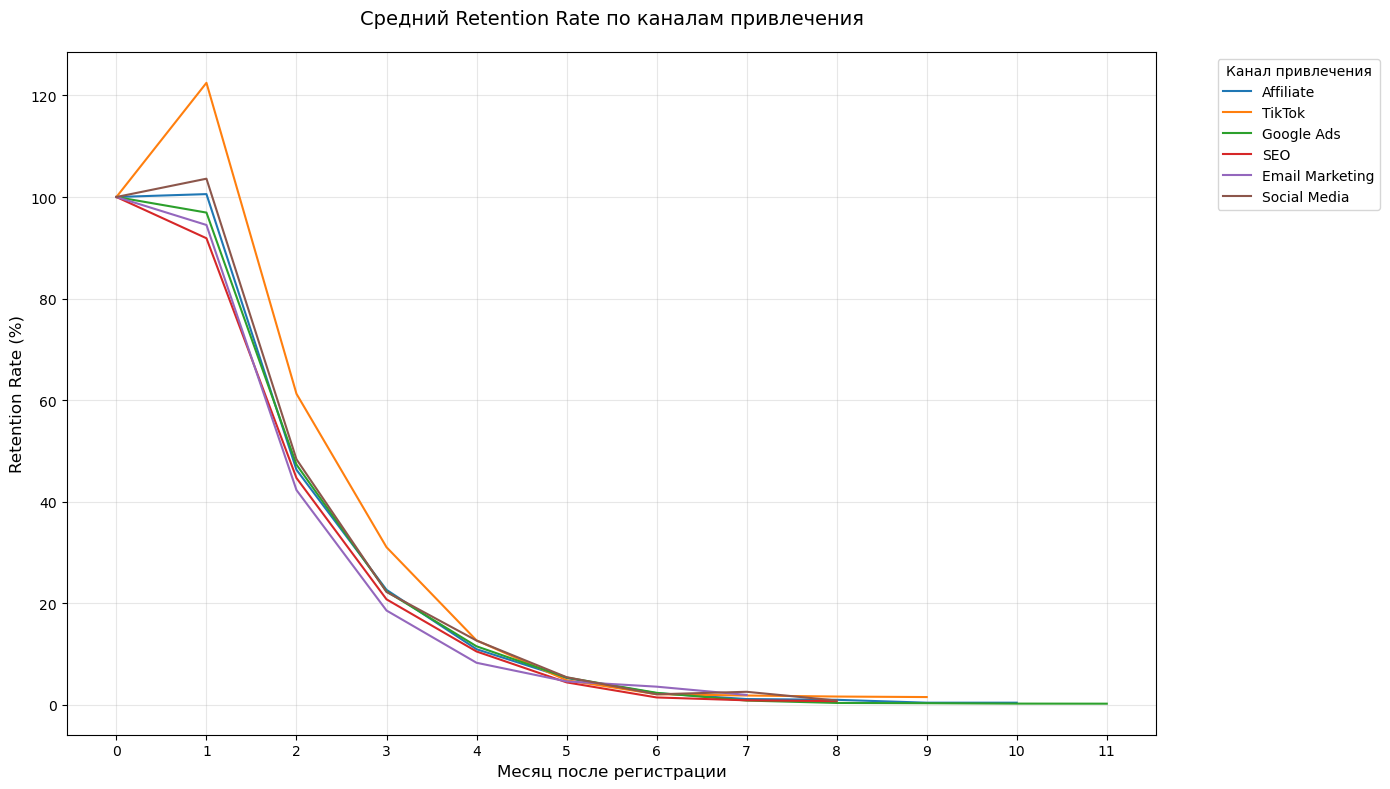

In [61]:
# Определяем когорту регистрации для каждого пользователя
cohort_map = users.set_index('user_id')['cohort_month'].to_dict()
events['cohort_month'] = events['user_id'].map(cohort_map)

# Добавляем канал привлечения к событиям
# Берем канал привлечения для каждого пользователя из таблицы users
channel_map = users.set_index('user_id')['acq_channel'].to_dict()
events['acq_channel'] = events['user_id'].map(channel_map)

# Фильтруем события после регистрации
events['event_month'] = pd.to_datetime(events['event_date']).dt.to_period('M').dt.to_timestamp()
events['cohort_month'] = pd.to_datetime(events['cohort_month'])
events = events[events['event_month'] >= events['cohort_month']]

# Рассчитываем разницу в периодах (месяцах)
events['n_period'] = (events['event_month'].dt.to_period('M') - events['cohort_month'].dt.to_period('M')).apply(lambda x: x.n)

# Создаем сводную таблицу по каналам привлечения
# Фильтруем только события с известным каналом привлечения
events_with_channel = events.dropna(subset=['acq_channel'])

# Рассчитываем Retention для каждого канала отдельно
channel_list = events_with_channel['acq_channel'].unique()

# Линейный график среднего Retention по каналам привлечения
plt.figure(figsize=(14, 8))

for channel_name in channel_list:
    # Фильтруем события для конкретного канала
    channel_events = events_with_channel[events_with_channel['acq_channel'] == channel_name]
    
    if not channel_events.empty:
        # Создаем pivot-таблицу для этого канала
        data_pivot = pd.pivot_table(
            channel_events, 
            values='user_id', 
            index='cohort_month', 
            columns='n_period', 
            aggfunc=pd.Series.nunique
        )
        
        # Если есть данные, рассчитываем Retention
        if not data_pivot.empty and 0 in data_pivot.columns:
            data_pivot = data_pivot.div(data_pivot[0], axis=0)
            
            # Считаем средний retention по всем когортам
            avg_retention = data_pivot.mean().reset_index()
            avg_retention.columns = ['month_num', 'retention_rate']
            
            # Строим график
            plt.plot(avg_retention['month_num'], 
                    avg_retention['retention_rate'] * 100,
                    linewidth=1.5, label=channel_name)

plt.title('Средний Retention Rate по каналам привлечения', fontsize=14, pad=20)
plt.xlabel('Месяц после регистрации', fontsize=12)
plt.ylabel('Retention Rate (%)', fontsize=12)
plt.legend(title='Канал привлечения', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.xticks(range(0, int(events_with_channel['n_period'].max()) + 1))
plt.tight_layout()
plt.show()

In [62]:
# Добавляем канал привлечения к событиям
events['acq_channel'] = events['user_id'].map(users.set_index('user_id')['acq_channel'])

# Задаём порядок шагов в воронке
funnel_steps = ['product_view', 'add_to_cart', 'checkout_start', 'checkout_complete']

# Фильтруем датасет, оставляя только нужные шаги воронки
funnel_df_steps = events[events['event_type'].isin(funnel_steps)]

# Получаем список каналов привлечения
channels = funnel_df_steps['acq_channel'].dropna().unique()

# Подготавливаем данные для всех каналов
all_channels_data = []

for channel in channels:
    # Фильтруем события для текущего канала
    channel_funnel = funnel_df_steps[funnel_df_steps['acq_channel'] == channel]
    
    # Считаем число уникальных пользователей на каждом шаге
    funnel_counts = channel_funnel.groupby('event_type')['user_id'].nunique().reindex(funnel_steps)
    
    # Создаем DataFrame для воронки
    channel_funnel_df = pd.DataFrame({
        'step': funnel_steps,
        'users': funnel_counts.values,
        'channel': channel
    })
    
    # Добавляем конверсии от первого шага
    channel_funnel_df['conversion_from_first_%'] = (channel_funnel_df['users'] / channel_funnel_df['users'].iloc[0] * 100).round(1)
    
    # Добавляем конверсии step-by-step
    channel_funnel_df['conversion_from_previous_%'] = (channel_funnel_df['users'] / channel_funnel_df['users'].shift(1) * 100).round(1)
    channel_funnel_df.loc[0, 'conversion_from_previous_%'] = 100  # Первый шаг всегда 100%
    
    all_channels_data.append(channel_funnel_df)

# Объединяем все данные
combined_funnel_df = pd.concat(all_channels_data, ignore_index=True)

# Воронка конверсии от первого шага
fig1 = px.funnel(
    combined_funnel_df,
    x='conversion_from_first_%',
    y='step',
    color='channel',
    title='Воронки конверсии по каналам привлечения (от первого шага)',
    labels={
        'conversion_from_first_%': 'Конверсия от первого шага (%)',
        'step': 'Этапы воронки',
        'channel': 'Канал привлечения'
    },
    hover_data=['users'],
    color_discrete_sequence=px.colors.qualitative.Set3
)

# Добавляем проценты на график
fig1.update_traces(
    texttemplate='%{x:.1f}%',
    textposition='inside',
    textfont=dict(size=12, color='black')
)

fig1.update_layout(
    height=600,
    width=1000,
    legend_title="Каналы привлечения",
    showlegend=True
)

fig1.show()

# Воронка конверсии step-by-step (от предыдущего шага)
fig2 = px.funnel(
    combined_funnel_df,
    x='conversion_from_previous_%',
    y='step',
    color='channel',
    title='Воронки конверсии по каналам привлечения (step-by-step)',
    labels={
        'conversion_from_previous_%': 'Конверсия от предыдущего шага (%)',
        'step': 'Этапы воронки',
        'channel': 'Канал привлечения'
    },
    hover_data=['users'],
    color_discrete_sequence=px.colors.qualitative.Set3
)

# Добавляем проценты на график
fig2.update_traces(
    texttemplate='%{x:.1f}%',
    textposition='inside',
    textfont=dict(size=12, color='black')
)

fig2.update_layout(
    height=600,
    width=1000,
    legend_title="Каналы привлечения",
    showlegend=True
)

fig2.show()

**Промежуточый вывод:**

**Лучшие каналы:**
- SEO — лидер по эффективности: низкий CAC (~190), высокий ROI (>100%), стабильный LTV (400–500), хорошая конверсия на всех этапах воронки.
- Email Marketing — лучший по удержанию (Stickiness до 3%) и завершению покупки (84.9% от checkout_start → complete).
    - Проблема: низкий LTV (~150–200) → нужно научить их платить больше.
- Affiliate — стабильный трафик, хороший LTV (~600+), высокая конверсия на checkout → надёжный, но не масштабируемый.

**Слабые/убыточные каналы:**
- TikTok — взрывной рост MAU/WAU, но:
    - Stickiness <1%,
    - Критическая утечка на add_to_cart → checkout_start (всего 58%),
    - ROI ~ –80% → теряет деньги.
    - Потенциал есть, но требует доработки UX и доверия.
- Google Ads — вышел из РФ (май–июнь 2024) → данные исторические, не актуальны для текущих инвестиций.
- Social Media — слабый по всем метрикам, но исправимый — можно тестировать улучшения на checkout.

**Гипотеза:**
Если по Email Marketing добавить персональные скидки с ограничением по времени — LTV вырастет на 20%, ROI станет положительным.
Основа: высокая Stickiness, но низкий LTV → нужен триггер к покупке.

**Сегментация по операционным системам**

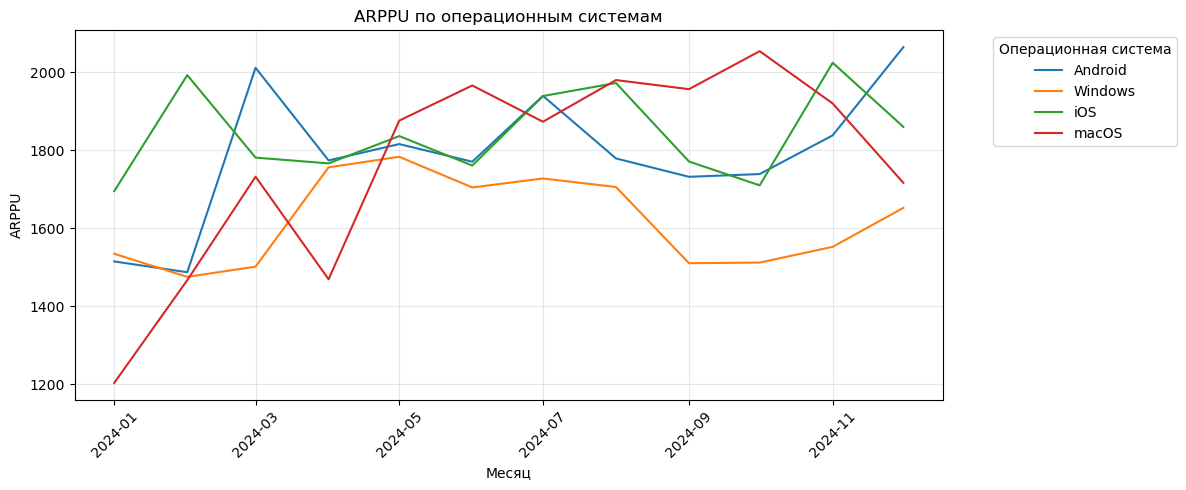

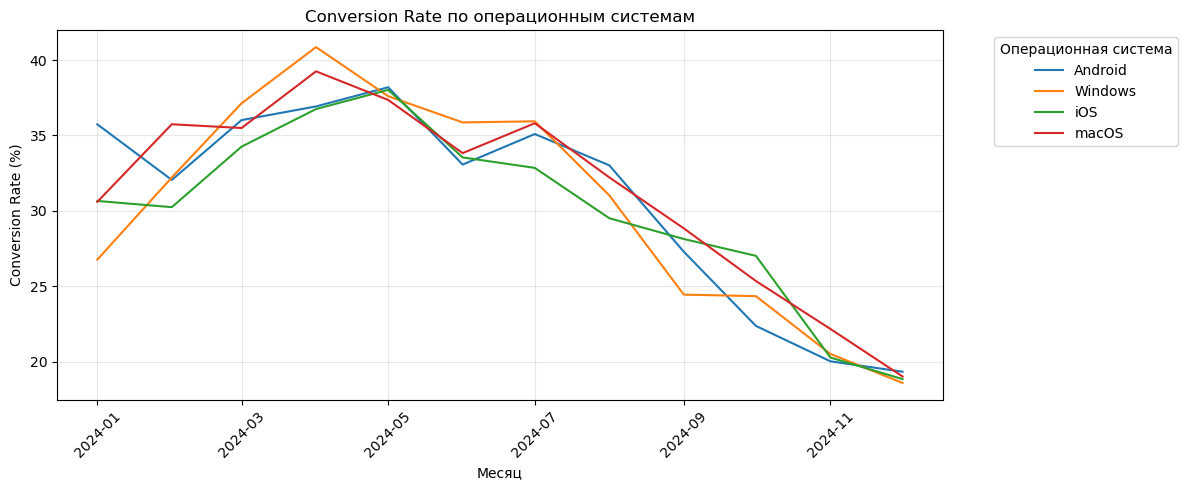

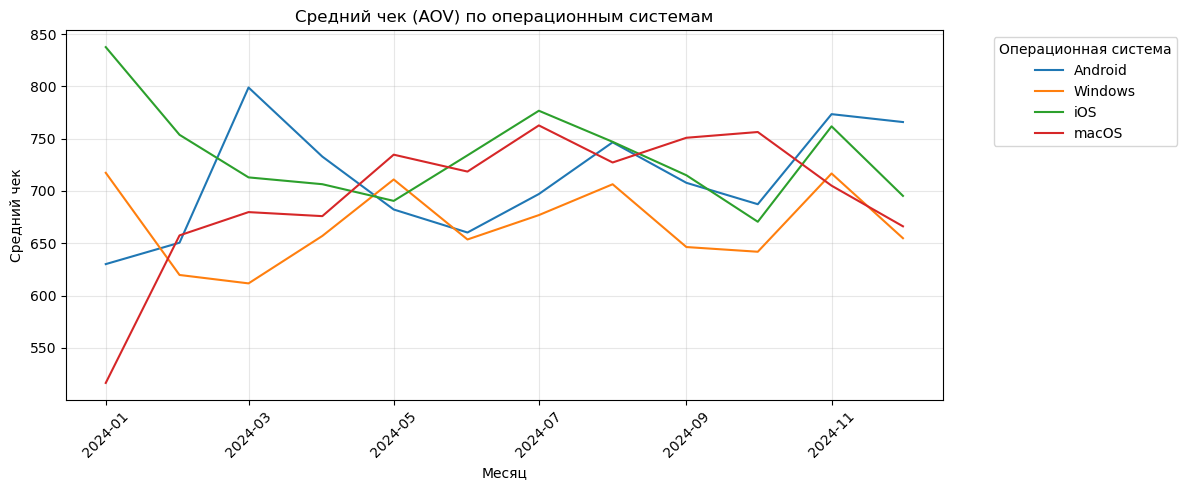

In [65]:
# ARPPU по операционным системам
# Добавляем операционную систему к заказам
orders['event_month'] = pd.to_datetime(orders['order_date']).dt.to_period('M').dt.to_timestamp()
events['event_month'] = pd.to_datetime(events['event_date']).dt.to_period('M').dt.to_timestamp()

# Берем последнюю ОС для каждого пользователя
latest_os = events.sort_values('event_date').groupby('user_id')['os'].last().reset_index()

orders_with_os = pd.merge(
    orders,
    latest_os,
    on='user_id',
    how='left'
)

# Удаляем записи без ОС
orders_with_os = orders_with_os.dropna(subset=['os'])

# ARPPU по ОС и месяцам
arppu_os_monthly = orders_with_os.groupby(['event_month', 'os']).agg({
    'revenue': 'sum',
    'user_id': 'nunique'
}).reset_index()

arppu_os_monthly = arppu_os_monthly.rename(columns={
    'revenue': 'total_revenue',
    'user_id': 'paying_users'
})

arppu_os_monthly['ARPPU'] = arppu_os_monthly['total_revenue'] / arppu_os_monthly['paying_users']

# График ARPPU по ОС
plt.figure(figsize=(12, 5))
os_list = arppu_os_monthly['os'].unique()

for os_name in os_list:
    os_data = arppu_os_monthly[arppu_os_monthly['os'] == os_name]
    plt.plot(os_data['event_month'], os_data['ARPPU'], label=os_name, linewidth=1.5)

plt.title('ARPPU по операционным системам')
plt.xlabel('Месяц')
plt.ylabel('ARPPU')
plt.legend(title='Операционная система', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# CR (Conversion Rate) по операционным системам
# Добавляем ОС к активным пользователям
active_users_os = events.groupby(['event_month', 'os'])['user_id'].nunique().reset_index()
active_users_os = active_users_os.rename(columns={'user_id': 'active_users'})

# Платящие пользователи по ОС и месяцам
paying_users_os = orders_with_os.groupby(['event_month', 'os'])['user_id'].nunique().reset_index()
paying_users_os = paying_users_os.rename(columns={'user_id': 'paying_users'})

# Объединяем для расчета CR
cr_os_monthly = pd.merge(
    active_users_os,
    paying_users_os,
    on=['event_month', 'os'],
    how='left'
).fillna(0)

cr_os_monthly['CR'] = cr_os_monthly['paying_users'] / cr_os_monthly['active_users'] * 100
cr_os_monthly['CR'] = cr_os_monthly['CR'].fillna(0)

# График CR по ОС
plt.figure(figsize=(12, 5))
os_list_cr = cr_os_monthly['os'].unique()

for os_name in os_list_cr:
    os_data = cr_os_monthly[cr_os_monthly['os'] == os_name]
    plt.plot(os_data['event_month'], os_data['CR'], label=os_name, linewidth=1.5)

plt.title('Conversion Rate по операционным системам')
plt.xlabel('Месяц')
plt.ylabel('Conversion Rate (%)')
plt.legend(title='Операционная система', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Средний чек (AOV) по операционным системам
aov_os_monthly = orders_with_os.groupby(['event_month', 'os'])['revenue'].mean().reset_index()
aov_os_monthly = aov_os_monthly.rename(columns={'revenue': 'AOV'})

# График AOV по ОС
plt.figure(figsize=(12, 5))
os_list_aov = aov_os_monthly['os'].unique()

for os_name in os_list_aov:
    os_data = aov_os_monthly[aov_os_monthly['os'] == os_name]
    plt.plot(os_data['event_month'], os_data['AOV'], label=os_name, linewidth=1.5)

plt.title('Средний чек (AOV) по операционным системам')
plt.xlabel('Месяц')
plt.ylabel('Средний чек')
plt.legend(title='Операционная система', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

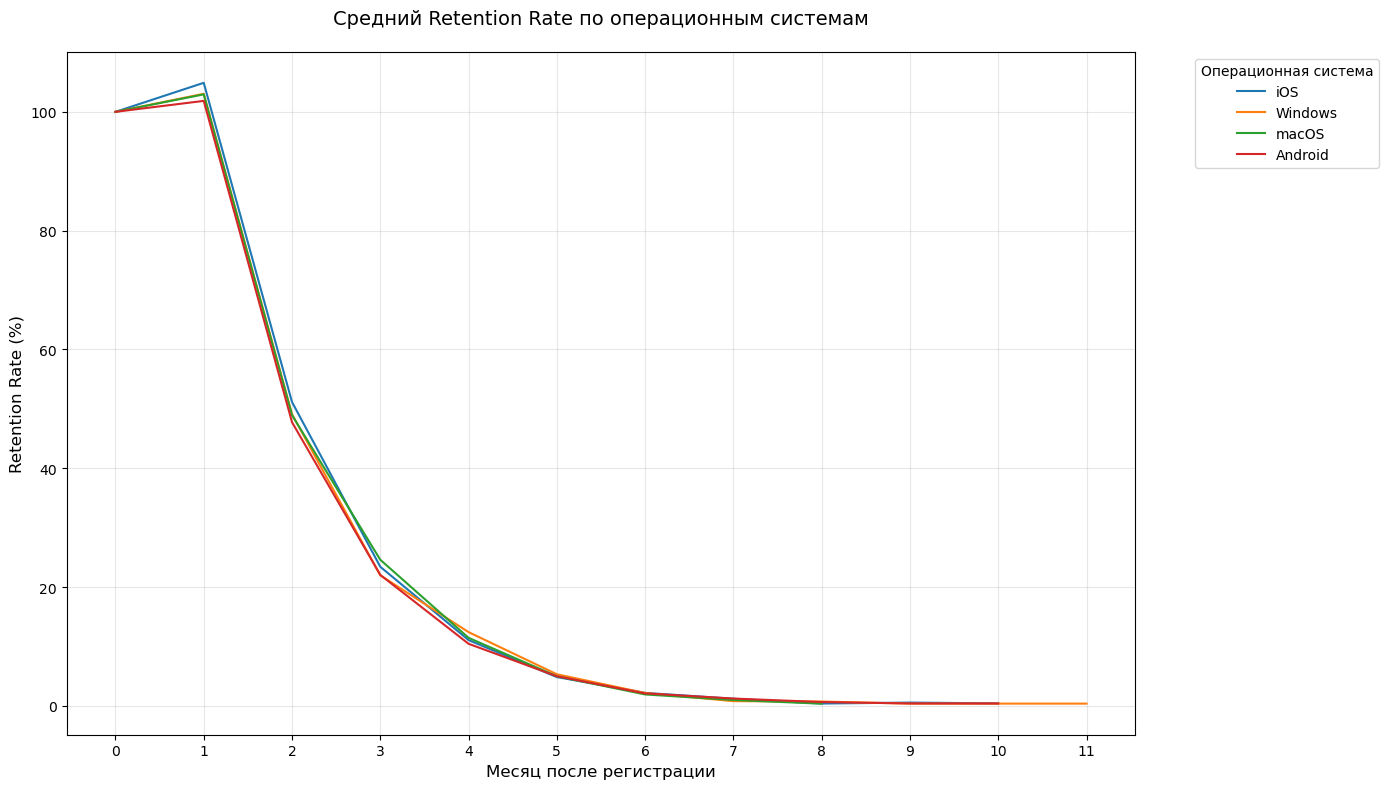

In [66]:
# Определяем когорту регистрации для каждого пользователя
cohort_map = users.set_index('user_id')['cohort_month'].to_dict()
events['cohort_month'] = events['user_id'].map(cohort_map)

# Добавляем операционную систему к событиям
# Берем первую ОС для каждого пользователя
first_os = events.sort_values('event_date').groupby('user_id')['os'].first().reset_index()
events['os'] = events['user_id'].map(first_os.set_index('user_id')['os'])

# Фильтруем события после регистрации
events['event_month'] = pd.to_datetime(events['event_date']).dt.to_period('M').dt.to_timestamp()
events['cohort_month'] = pd.to_datetime(events['cohort_month'])
events = events[events['event_month'] >= events['cohort_month']]

# Рассчитываем разницу в периодах (месяцах)
events['n_period'] = (events['event_month'].dt.to_period('M') - events['cohort_month'].dt.to_period('M')).apply(lambda x: x.n)

# Создаем сводную таблицу по ОС
# Фильтруем только события с известной ОС
events_with_os = events.dropna(subset=['os'])

# Рассчитываем Retention для каждой ОС отдельно
os_list = events_with_os['os'].unique()

# Линейный график среднего Retention по ОС
plt.figure(figsize=(14, 8))

for os_name in os_list:
    # Фильтруем события для конкретной ОС
    os_events = events_with_os[events_with_os['os'] == os_name]
    
    if not os_events.empty:
        # Создаем pivot-таблицу для этой ОС
        data_pivot = pd.pivot_table(
            os_events, 
            values='user_id', 
            index='cohort_month', 
            columns='n_period', 
            aggfunc=pd.Series.nunique
        )
        
        # Если есть данные, рассчитываем Retention
        if not data_pivot.empty and 0 in data_pivot.columns:
            data_pivot = data_pivot.div(data_pivot[0], axis=0)
            
            # Считаем средний retention по всем когортам
            avg_retention = data_pivot.mean().reset_index()
            avg_retention.columns = ['month_num', 'retention_rate']
            
            # Строим график
            plt.plot(avg_retention['month_num'], 
                    avg_retention['retention_rate'] * 100,
                    linewidth=1.5, label=os_name)

plt.title('Средний Retention Rate по операционным системам', fontsize=14, pad=20)
plt.xlabel('Месяц после регистрации', fontsize=12)
plt.ylabel('Retention Rate (%)', fontsize=12)
plt.legend(title='Операционная система', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.xticks(range(0, int(events_with_os['n_period'].max()) + 1))
plt.tight_layout()
plt.show()

**Промежуточный вывод:**

- ARPPU:
    - iOS и macOS — лидеры (~1900–2100), особенно в пиковые месяцы.
    - Android и Windows — заметно ниже (~1600–1800).

Вывод: пользователи Apple-устройств платят больше — персонализировать предложения под них.

- Conversion Rate:
    - Windows — выше всех до мая (~40%), но резко падает к концу года.
    - iOS — стабильно ~35–38%, лучше Android.

Вывод: Windows-пользователи конвертируют лучше, но теряют интерес — возможно, UX или цены.

- AOV (Средний чек):
    - iOS — лидер (~750–850), далее macOS и Android.
    - Windows — самый низкий (~600–700) несмотря на высокий CR.

Вывод: Windows-пользователи покупают чаще, но дешевле.

- Retention Rate:
    - Все ОС теряют >80% за 2 месяца — общая проблема продукта.
    - iOS чуть лучше, но разница минимальна.

Вывод: удержание — не вопрос ОС, а общий UX/ценность продукта.

**Выводы:**
- iOS — «золотой» сегмент: высокий ARPPU, AOV, стабильный CR → фокус на персонализации и retention.
- Windows — потенциал для роста: высокая конверсия, но низкий чек → тестировать акции, рекомендации, премиум-товары.
- Android — слабый по доходу: нужно тестировать мотивацию к покупкам и повышение ценности.
- Web (Windows/macOS) — разделить: Windows — конверсия, macOS — доход — оптимизировать под каждую задачу.

**Гипотеза для A/B-теста:**
Если показывать iOS-пользователям персонализированные премиум-предложения — ARPPU вырастет на 10–15%. iOS лидирует по ARPPU и AOV → пользователи готовы платить больше.

**Сегментация по регионам**

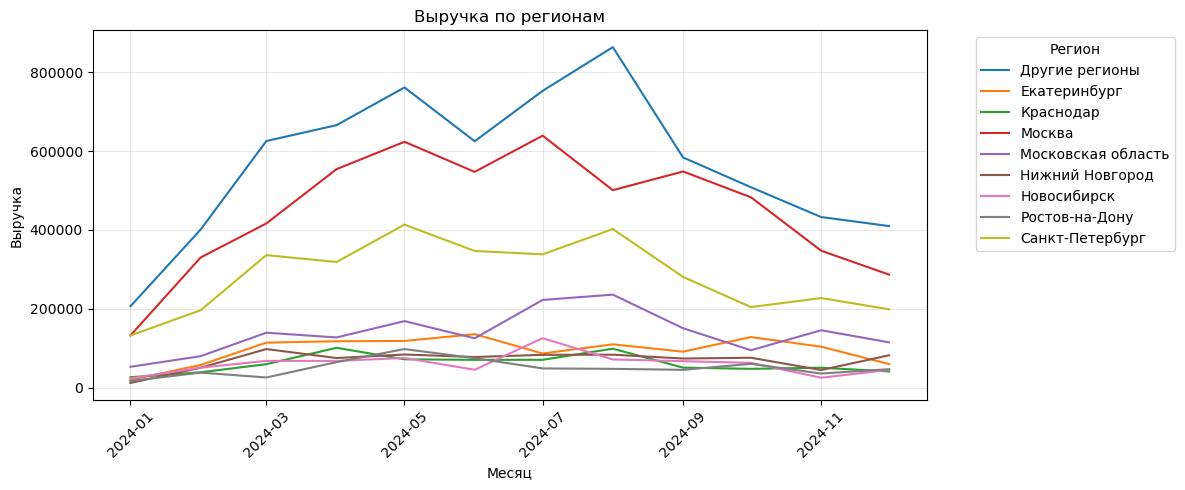

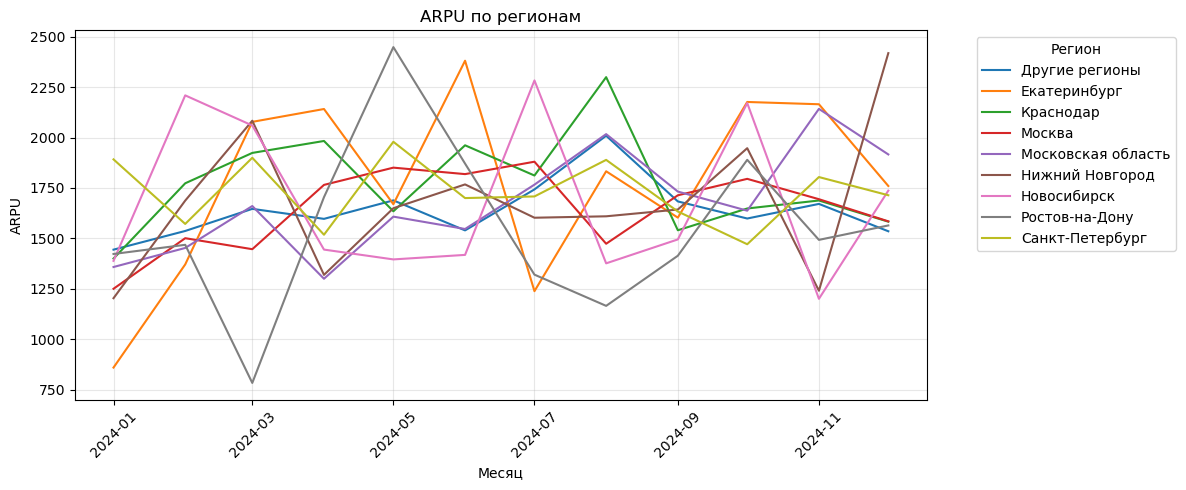

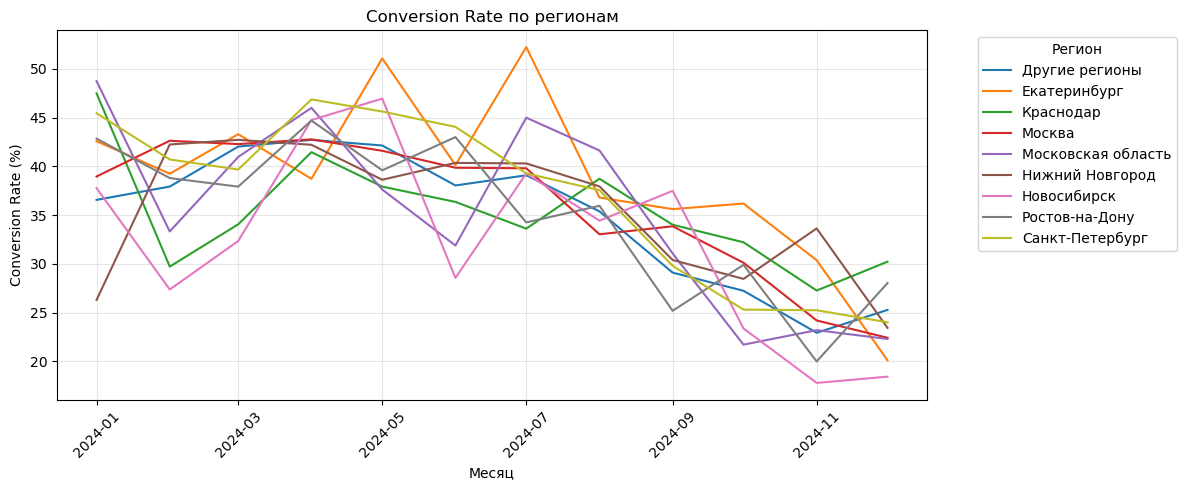

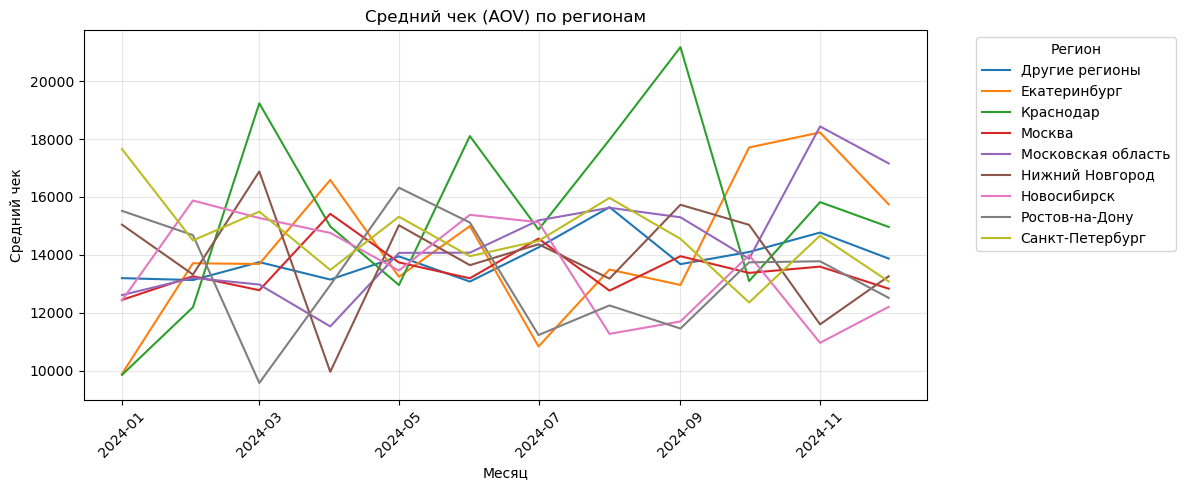

In [69]:
# Добавляем регион к заказам и событиям
region_map = users.set_index('user_id')['region'].to_dict()
orders['region'] = orders['user_id'].map(region_map)
events['region'] = events['user_id'].map(region_map)

# Удаляем записи без региона
orders_with_region = orders.dropna(subset=['region'])
events_with_region = events.dropna(subset=['region'])

# Выручка по регионам

revenue_by_region = orders_with_region.groupby(['order_month', 'region'])['revenue'].sum().reset_index()

# График выручки по регионам
plt.figure(figsize=(12, 5))
regions_list = revenue_by_region['region'].unique()

for region_name in regions_list:
    region_data = revenue_by_region[revenue_by_region['region'] == region_name]
    plt.plot(region_data['order_month'], region_data['revenue'], 
             label=region_name, linewidth=1.5)

plt.title('Выручка по регионам')
plt.xlabel('Месяц')
plt.ylabel('Выручка')
plt.legend(title='Регион', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ARPU по регионам
arpu_by_region = orders_with_region.groupby(['order_month', 'region']).agg({
    'revenue': 'sum',
    'user_id': 'nunique'
}).reset_index()

arpu_by_region = arpu_by_region.rename(columns={
    'revenue': 'total_revenue',
    'user_id': 'paying_users'
})

arpu_by_region['ARPU'] = arpu_by_region['total_revenue'] / arpu_by_region['paying_users']

# График ARPU по регионам
plt.figure(figsize=(12, 5))

for region_name in regions_list:
    region_data = arpu_by_region[arpu_by_region['region'] == region_name]
    plt.plot(region_data['order_month'], region_data['ARPU'], 
             label=region_name, linewidth=1.5)

plt.title('ARPU по регионам')
plt.xlabel('Месяц')
plt.ylabel('ARPU')
plt.legend(title='Регион', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# CR (Conversion Rate) по регионам
events_with_region['event_month'] = pd.to_datetime(events_with_region['event_date']).dt.to_period('M').dt.to_timestamp()

# Активные пользователи по регионам и месяцам
active_users_region = events_with_region.groupby(['event_month', 'region'])['user_id'].nunique().reset_index()
active_users_region = active_users_region.rename(columns={'user_id': 'active_users'})

# Платящие пользователи по регионам и месяцам
paying_users_region = orders_with_region.groupby(['order_month', 'region'])['user_id'].nunique().reset_index()
paying_users_region = paying_users_region.rename(columns={'user_id': 'paying_users'})

# Объединяем для расчета CR
cr_by_region = pd.merge(
    active_users_region,
    paying_users_region,
    left_on=['event_month', 'region'],
    right_on=['order_month', 'region'],
    how='left'
).fillna(0)

cr_by_region['CR'] = cr_by_region['paying_users'] / cr_by_region['active_users'] * 100
cr_by_region['CR'] = cr_by_region['CR'].fillna(0)

# График CR по регионам
plt.figure(figsize=(12, 5))
regions_list_cr = cr_by_region['region'].unique()

for region_name in regions_list_cr:
    region_data = cr_by_region[cr_by_region['region'] == region_name]
    plt.plot(region_data['event_month'], region_data['CR'],
             label=region_name, linewidth=1.5)

plt.title('Conversion Rate по регионам')
plt.xlabel('Месяц')
plt.ylabel('Conversion Rate (%)')
plt.legend(title='Регион', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Средний чек (AOV) по регионам
aov_by_region = orders_with_region.groupby(['order_month', 'region'])['total_price'].mean().reset_index()
aov_by_region = aov_by_region.rename(columns={'total_price': 'AOV'})

# График AOV по регионам
plt.figure(figsize=(12, 5))
regions_list_aov = aov_by_region['region'].unique()

for region_name in regions_list_aov:
    region_data = aov_by_region[aov_by_region['region'] == region_name]
    plt.plot(region_data['order_month'], region_data['AOV'],
             label=region_name, linewidth=1.5)

plt.title('Средний чек (AOV) по регионам')
plt.xlabel('Месяц')
plt.ylabel('Средний чек')
plt.legend(title='Регион', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Промежуточный вывод:**

- Выручка:
    - Лидер — Москва (до 600K+), далее Санкт-Петербург, Другие регионы.
    - Екатеринбург, Краснодар — стабильные, но низкие объемы.

Вывод: Москва — основной драйвер дохода, но падает с сентября.

- ARPU:
    - Нижний Новгород — аномальный пик в мае (~2500), далее резкое падение — возможно, единичные заказы.
    - Екатеринбург, Новосибирск — высокий ARPU (~2000–2300) при умеренной выручке → потенциал для масштабирования.

Москва — ARPU ~1700–1800 — ниже ожидаемого для крупного города.

- Conversion Rate:
    - Екатеринбург — лидер (~50% в июле), далее Московская область, Санкт-Петербург.
    - Москва — CR ~35–40%, ниже среднего — возможно, конкуренция или UX-проблемы.

Вывод: Екатеринбург — самый конверсионный регион — тестировать его опыт в других городах.

- AOV (Средний чек):
    - Краснодар — аномально высокий (~20K+ в сентябре) — возможно, единичные крупные заказы.
    - Екатеринбург, Новосибирск — стабильно высокий AOV (~16K–18K).
    - Москва — средний чек ~13K–14K — ниже, чем в регионах.

**Выводы:**
- Екатеринбург — золотой регион: высокий CR, хороший AOV, стабильный ARPU → масштабировать успешные практики.
- Москва — под вопросом: большая выручка, но низкий CR и AOV — нужна диагностика UX/конкуренции.
- Новосибирск и Московская область — перспективные: высокий ARPU и CR — можно увеличивать трафик.
- Регионы с аномалиями (Нижний Новгород, Краснодар) — проверить данные на выбросы, затем решать — масштабировать или игнорировать.

**Гипотеза для A/B-теста:**
Если адаптировать UX и предложения под московских пользователей по аналогии с Екатеринбургом — CR вырастет на 5–7%. Екатеринбург — лидер по конверсии, Москва — отстаёт при большей аудитории.

**Анализ по сегменту покупателя**

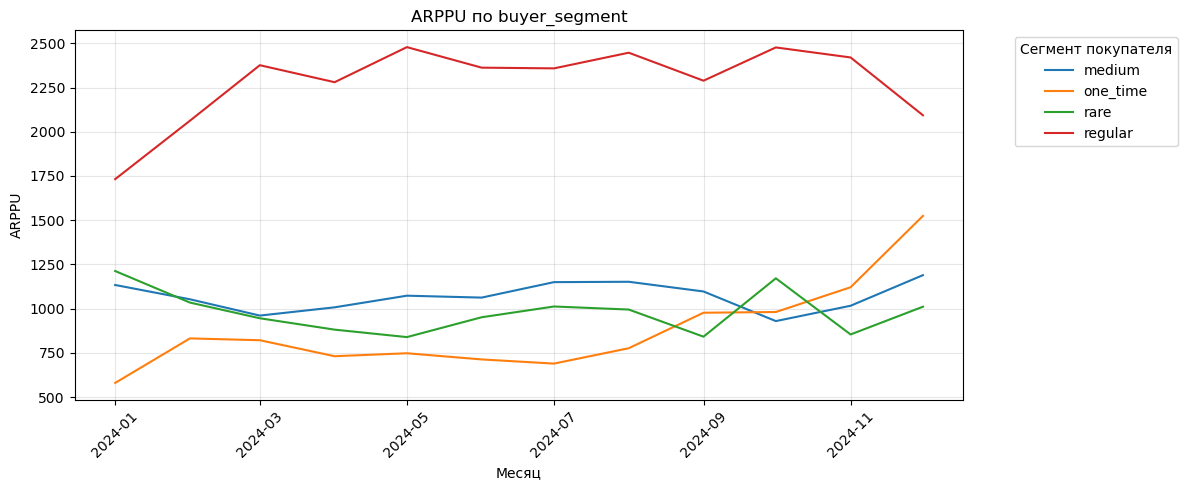

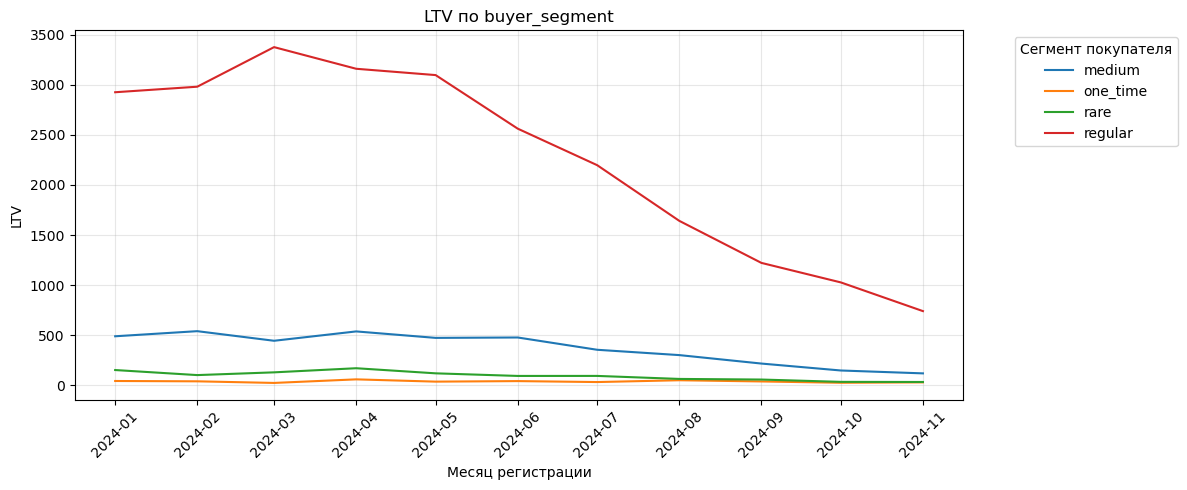

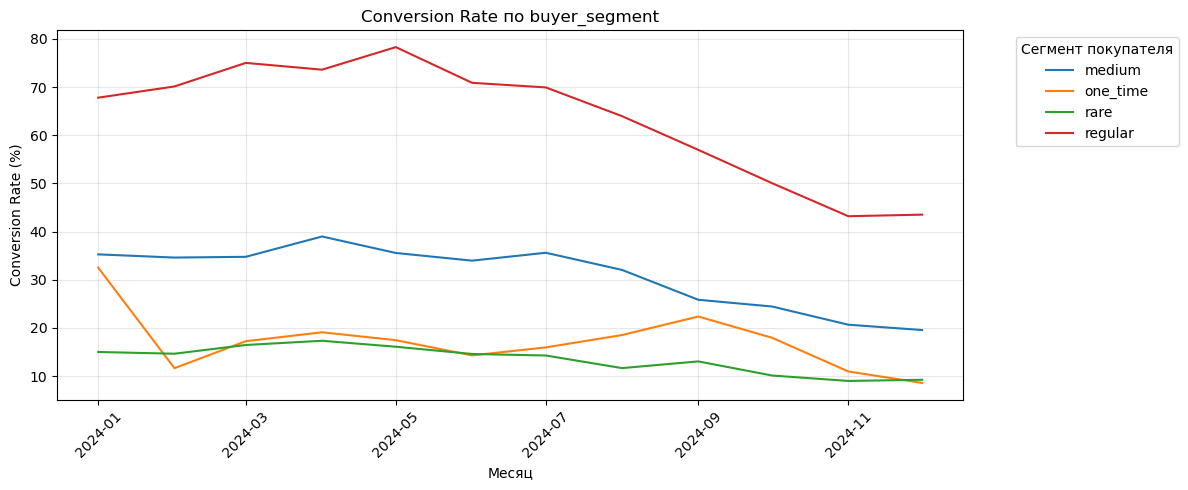

In [72]:
# ARPPU по buyer_segment
# Добавляем buyer_segment к заказам
buyer_segment_map = users.set_index('user_id')['buyer_segment'].to_dict()
orders['buyer_segment'] = orders['user_id'].map(buyer_segment_map)

# Удаляем записи без buyer_segment
orders_with_segment = orders.dropna(subset=['buyer_segment'])

# ARPPU по buyer_segment и месяцам

arppu_by_segment = orders_with_segment.groupby(['order_month', 'buyer_segment']).agg({
    'revenue': 'sum',
    'user_id': 'nunique'
}).reset_index()

arppu_by_segment = arppu_by_segment.rename(columns={
    'revenue': 'total_revenue',
    'user_id': 'paying_users'
})

arppu_by_segment['ARPPU'] = arppu_by_segment['total_revenue'] / arppu_by_segment['paying_users']

# График ARPPU по buyer_segment
plt.figure(figsize=(12, 5))
segments_list = arppu_by_segment['buyer_segment'].unique()

for segment in segments_list:
    segment_data = arppu_by_segment[arppu_by_segment['buyer_segment'] == segment]
    plt.plot(segment_data['order_month'], segment_data['ARPPU'],
             label=segment, linewidth=1.5)

plt.title('ARPPU по buyer_segment')
plt.xlabel('Месяц')
plt.ylabel('ARPPU')
plt.legend(title='Сегмент покупателя', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# LTV по buyer_segment
# Добавляем buyer_segment и cohort_month
users['cohort_month'] = pd.to_datetime(users['cohort_month'])
users_segment_map = users.set_index('user_id')[['cohort_month', 'buyer_segment']].to_dict(orient='index')

# Создаем DataFrame для LTV
ltv_data = []
for user_id, row in users_segment_map.items():
    cohort_month = row['cohort_month']
    segment = row['buyer_segment']
    
    if pd.notna(segment) and pd.notna(cohort_month):
        # Находим все заказы пользователя
        user_orders = orders[orders['user_id'] == user_id]
        total_revenue = user_orders['revenue'].sum()
        
        ltv_data.append({
            'cohort_month': cohort_month,
            'buyer_segment': segment,
            'user_id': user_id,
            'total_revenue': total_revenue
        })

ltv_df = pd.DataFrame(ltv_data)

# LTV по buyer_segment и когортам
ltv_by_segment = ltv_df.groupby(['cohort_month', 'buyer_segment']).agg({
    'user_id': 'count',
    'total_revenue': 'sum'
}).reset_index()

ltv_by_segment = ltv_by_segment.rename(columns={
    'user_id': 'users_count',
    'total_revenue': 'total_revenue_sum'
})

ltv_by_segment['LTV'] = ltv_by_segment['total_revenue_sum'] / ltv_by_segment['users_count']

# Удаляем последний месяц
ltv_by_segment = ltv_by_segment.sort_values('cohort_month')
last_month = ltv_by_segment['cohort_month'].max()
ltv_by_segment = ltv_by_segment[ltv_by_segment['cohort_month'] < last_month]

# График LTV по buyer_segment
plt.figure(figsize=(12, 5))
segments_list_ltv = ltv_by_segment['buyer_segment'].unique()

for segment in segments_list_ltv:
    segment_data = ltv_by_segment[ltv_by_segment['buyer_segment'] == segment]
    plt.plot(segment_data['cohort_month'], segment_data['LTV'],
             label=segment, linewidth=1.5)

plt.title('LTV по buyer_segment')
plt.xlabel('Месяц регистрации')
plt.ylabel('LTV')
plt.legend(title='Сегмент покупателя', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# CR (Conversion Rate) по buyer_segment
# Добавляем месяц для группировки
events['event_month'] = pd.to_datetime(events['event_date']).dt.to_period('M').dt.to_timestamp()
orders['order_month'] = pd.to_datetime(orders['order_date']).dt.to_period('M').dt.to_timestamp()

# Добавляем buyer_segment к событиям
events['buyer_segment'] = events['user_id'].map(buyer_segment_map)

# Активные пользователи по buyer_segment и месяцам
active_users_segment = events.dropna(subset=['buyer_segment']).groupby(['event_month', 'buyer_segment'])['user_id'].nunique().reset_index()
active_users_segment = active_users_segment.rename(columns={'user_id': 'active_users'})

# Платящие пользователи по buyer_segment и месяцам
paying_users_segment = orders_with_segment.groupby(['order_month', 'buyer_segment'])['user_id'].nunique().reset_index()
paying_users_segment = paying_users_segment.rename(columns={'user_id': 'paying_users', 'order_month': 'event_month'})

# Объединяем для расчета CR
cr_segment_monthly = pd.merge(
    active_users_segment,
    paying_users_segment,
    on=['event_month', 'buyer_segment'],
    how='left'
).fillna(0)

cr_segment_monthly['CR'] = cr_segment_monthly['paying_users'] / cr_segment_monthly['active_users'] * 100
cr_segment_monthly['CR'] = cr_segment_monthly['CR'].fillna(0)

# График CR по buyer_segment
plt.figure(figsize=(12, 5))
segment_list_cr = cr_segment_monthly['buyer_segment'].unique()

for segment in segment_list_cr:
    segment_data = cr_segment_monthly[cr_segment_monthly['buyer_segment'] == segment]
    plt.plot(segment_data['event_month'], segment_data['CR'], 
             label=segment, linewidth=1.5)

plt.title('Conversion Rate по buyer_segment')
plt.xlabel('Месяц')
plt.ylabel('Conversion Rate (%)')
plt.legend(title='Сегмент покупателя', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Промежуточный вывод:**

- ARPPU:
    - Regular — лидер (~2400–2500) → платят больше всего за визит.
    - One_time — резко растёт к концу года (~1500), возможно, привлекаются более дорогие товары или акции.
    - Medium & Rare — стабильно низкие (~800–1200).

Вывод: Regular — основной источник дохода с платящих.

- LTV:
    - Regular — самый высокий LTV (до 3400), но падает к концу года — теряют лояльность.
    - Medium — умеренный LTV (~500), стабильный.
    - One_time & Rare — очень низкий LTV (<100) → почти не возвращаются.

Вывод: Regular — ключевой сегмент для удержания, остальные — неэффективны.

- Conversion Rate:
    - Regular — лидирует (~70–80%), но снижается к декабрю.
    - Medium — ~35–40%, стабилен.
    - One_time & Rare — <20% → слабая мотивация к покупке.

Вывод: Regular — самые активные, но их нужно удерживать от ухода.

**Выводы:**
- Regular: высокий ARPPU, CR и LTV — фокус на удержании и персонализации.
- One_time — потенциал роста: ARPPU растёт, но LTV низкий — можно тестировать retention-механизмы (email, push, скидки).
- Rare & Medium — низкая эффективность — минимизировать траты на их привлечение.
- Тренд: Regular теряет активность — срочно тестировать повторное привлечение (например, персональные предложения).

**Гипотеза для A/B-теста:**
Если отправлять regular-пользователям персонализированные напоминания о корзине + скидку 5% — retention вырастет на 10%, а LTV — на 15%. Regular — главный источник дохода, но теряет активность.

**Сегментация по категориям товаров**

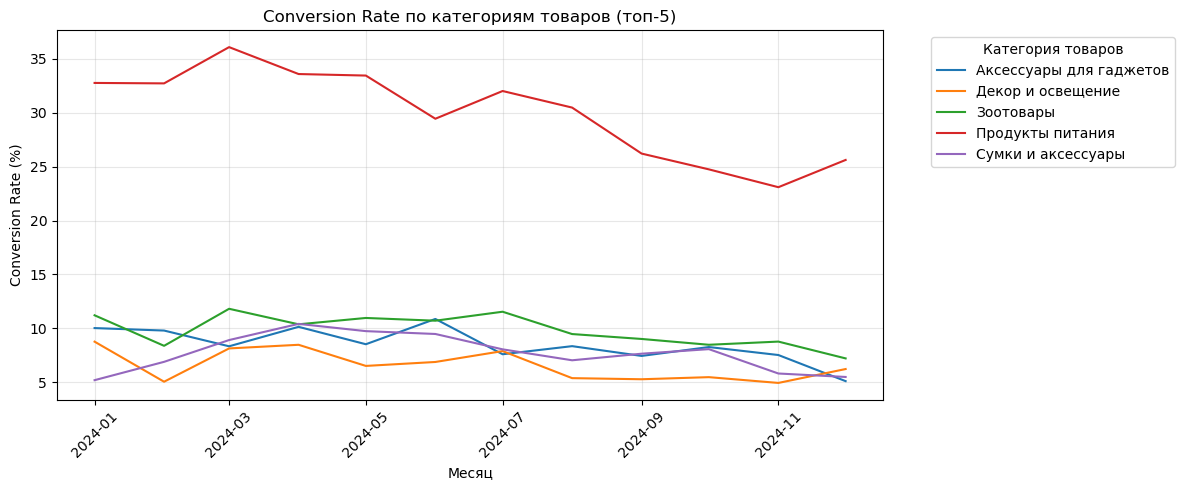

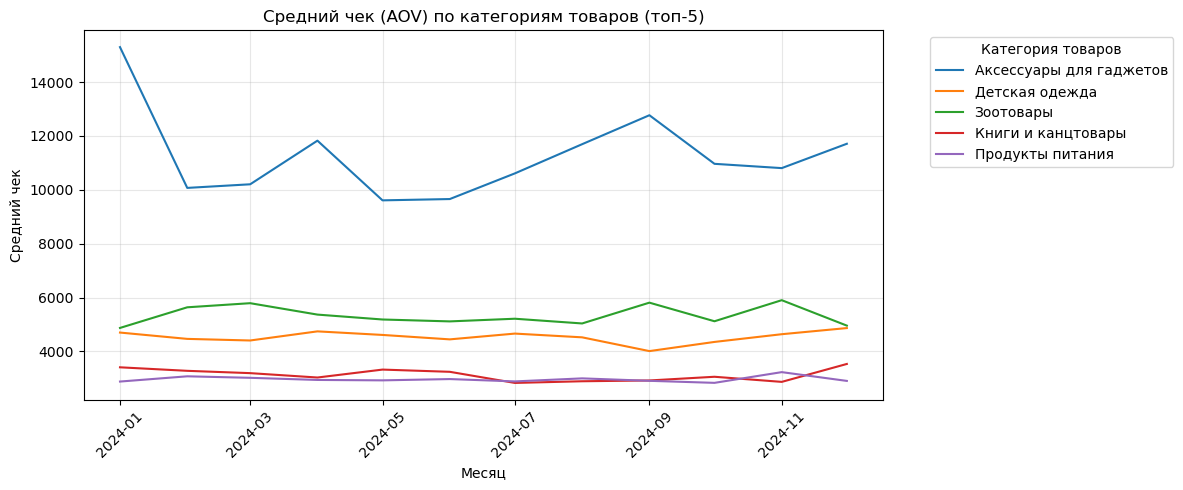

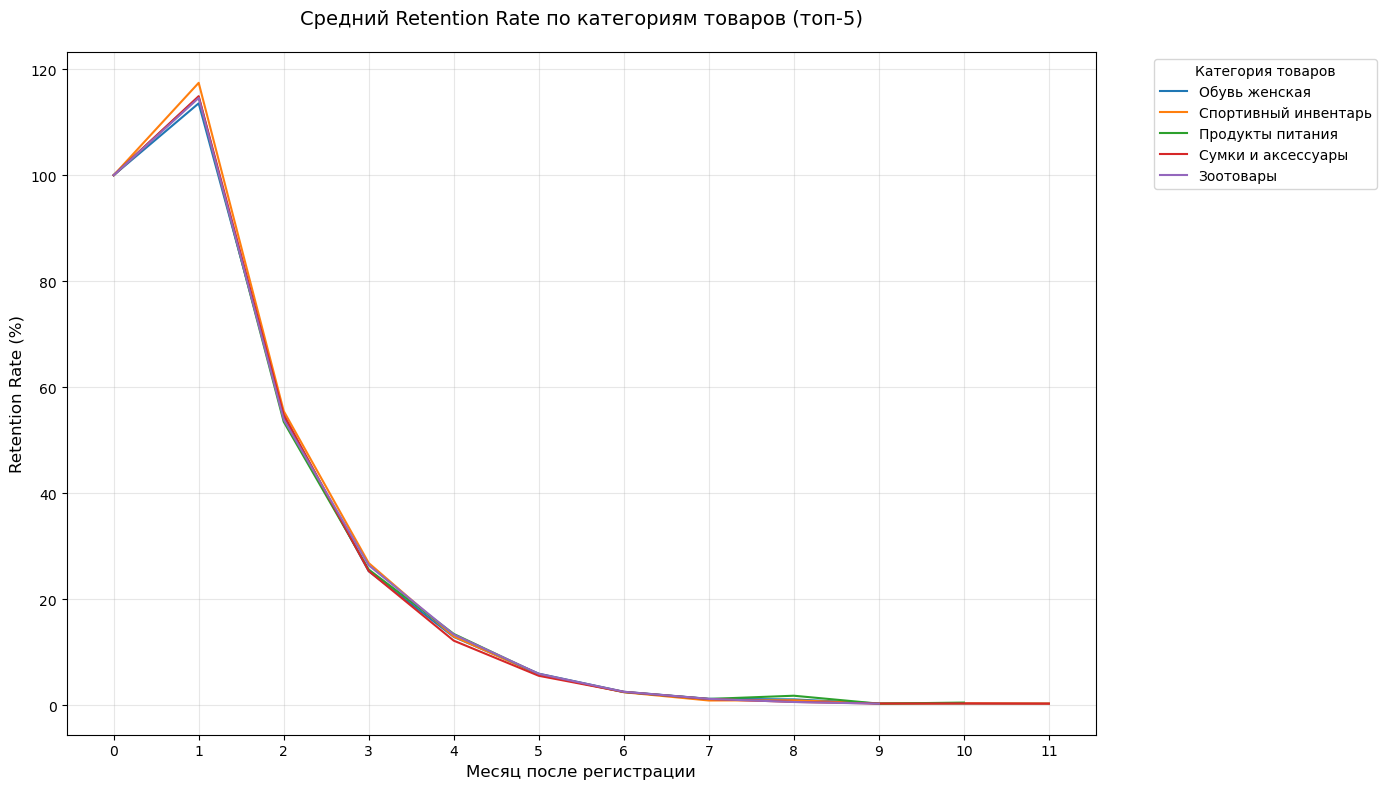

In [75]:
# CR (Conversion Rate) по категориям товаров
# Добавляем месяц для группировки
events['event_month'] = pd.to_datetime(events['event_date']).dt.to_period('M').dt.to_timestamp()
orders['order_month'] = pd.to_datetime(orders['order_date']).dt.to_period('M').dt.to_timestamp()

# Для CR по категориям нужно определить, какие категории просматривали пользователи
# Найдем категории товаров, которые просматривали пользователи через события product_view
if 'category_name' in events.columns:
    # Если есть категория в событиях
    events_with_category = events.dropna(subset=['category_name'])
else:
    # Если нет, свяжем через product_name
    # Сначала получим mapping product_name -> category_name из orders
    product_category_map = orders.drop_duplicates('product_name')[['product_name', 'category_name']]
    events_with_category = pd.merge(events, product_category_map, on='product_name', how='left')

# Активные пользователи по категориям и месяцам (уникальные пользователи, просмотревшие категорию)
active_users_category = events_with_category.groupby(['event_month', 'category_name'])['user_id'].nunique().reset_index()
active_users_category = active_users_category.rename(columns={'user_id': 'active_users'})

# Платящие пользователи по категориям и месяцам (уникальные пользователи, купившие из категории)
paying_users_category = orders.groupby(['order_month', 'category_name'])['user_id'].nunique().reset_index()
paying_users_category = paying_users_category.rename(columns={'user_id': 'paying_users', 'order_month': 'event_month'})

# Объединяем для расчета CR
cr_category_monthly = pd.merge(
    active_users_category,
    paying_users_category,
    on=['event_month', 'category_name'],
    how='left'
).fillna(0)

cr_category_monthly['CR'] = cr_category_monthly['paying_users'] / cr_category_monthly['active_users'] * 100
cr_category_monthly['CR'] = cr_category_monthly['CR'].fillna(0)

# График CR по категориям (топ-5 категорий по активности)
top_categories = active_users_category.groupby('category_name')['active_users'].sum().nlargest(5).index.tolist()
cr_top_categories = cr_category_monthly[cr_category_monthly['category_name'].isin(top_categories)]

plt.figure(figsize=(12, 5))
category_list_cr = cr_top_categories['category_name'].unique()

for category_name in category_list_cr:
    category_data = cr_top_categories[cr_top_categories['category_name'] == category_name]
    plt.plot(category_data['event_month'], category_data['CR'], label=category_name, linewidth=1.5)

plt.title('Conversion Rate по категориям товаров (топ-5)')
plt.xlabel('Месяц')
plt.ylabel('Conversion Rate (%)')
plt.legend(title='Категория товаров', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Средний чек (AOV) по категориям товаров
aov_category_monthly = orders.groupby(['order_month', 'category_name'])['total_price'].mean().reset_index()
aov_category_monthly = aov_category_monthly.rename(columns={'total_price': 'AOV', 'order_month': 'event_month'})

# График AOV по категориям (топ-5 категорий по количеству заказов)
top_categories_orders = orders.groupby('category_name').size().nlargest(5).index.tolist()
aov_top_categories = aov_category_monthly[aov_category_monthly['category_name'].isin(top_categories_orders)]

plt.figure(figsize=(12, 5))
category_list_aov = aov_top_categories['category_name'].unique()

for category_name in category_list_aov:
    category_data = aov_top_categories[aov_top_categories['category_name'] == category_name]
    plt.plot(category_data['event_month'], category_data['AOV'], label=category_name, linewidth=1.5)

plt.title('Средний чек (AOV) по категориям товаров (топ-5)')
plt.xlabel('Месяц')
plt.ylabel('Средний чек')
plt.legend(title='Категория товаров', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Retention Rate (RR) по категориям товаров
# Определяем когорту регистрации для каждого пользователя
cohort_map = users.set_index('user_id')['cohort_month'].to_dict()
events['cohort_month'] = events['user_id'].map(cohort_map)

# Фильтруем события после регистрации
events['event_month'] = pd.to_datetime(events['event_date']).dt.to_period('M').dt.to_timestamp()
events['cohort_month'] = pd.to_datetime(events['cohort_month'])
events = events[events['event_month'] >= events['cohort_month']]

# Рассчитываем разницу в периодах (месяцах)
events['n_period'] = (events['event_month'].dt.to_period('M') - events['cohort_month'].dt.to_period('M')).apply(lambda x: x.n)

# Связываем события с категориями товаров
if 'category_name' not in events.columns:
    # Если нет, свяжем через product_name
    product_category_map = orders.drop_duplicates('product_name')[['product_name', 'category_name']]
    events_with_category = pd.merge(events, product_category_map, on='product_name', how='left')
else:
    events_with_category = events.copy()

# Фильтруем только события с известной категорией
events_with_category = events_with_category.dropna(subset=['category_name'])

# Рассчитываем Retention для каждой категории отдельно (топ-5 категорий по активности)
top_categories_rr = events_with_category.groupby('category_name')['user_id'].nunique().nlargest(5).index.tolist()
events_top_categories = events_with_category[events_with_category['category_name'].isin(top_categories_rr)]

# Линейный график среднего Retention по категориям
plt.figure(figsize=(14, 8))
category_list_rr = events_top_categories['category_name'].unique()

for category_name in category_list_rr:
    # Фильтруем события для конкретной категории
    category_events = events_top_categories[events_top_categories['category_name'] == category_name]
    
    if not category_events.empty:
        # Создаем pivot-таблицу для этой категории
        data_pivot = pd.pivot_table(
            category_events, 
            values='user_id', 
            index='cohort_month', 
            columns='n_period', 
            aggfunc=pd.Series.nunique
        )
        
        # Если есть данные, рассчитываем Retention
        if not data_pivot.empty and 0 in data_pivot.columns:
            data_pivot = data_pivot.div(data_pivot[0], axis=0)
            
            # Считаем средний retention по всем когортам
            avg_retention = data_pivot.mean().reset_index()
            avg_retention.columns = ['month_num', 'retention_rate']
            
            # Строим график
            plt.plot(avg_retention['month_num'], 
                    avg_retention['retention_rate'] * 100,
                    linewidth=1.5, label=category_name)

plt.title('Средний Retention Rate по категориям товаров (топ-5)', fontsize=14, pad=20)
plt.xlabel('Месяц после регистрации', fontsize=12)
plt.ylabel('Retention Rate (%)', fontsize=12)
plt.legend(title='Категория товаров', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
if events_top_categories['n_period'].max() > 0:
    plt.xticks(range(0, int(events_top_categories['n_period'].max()) + 1))
plt.tight_layout()
plt.show()

**Промежуточный вывод:**

- Conversion Rate:
    - Продукты питания — лидер (~35–36%), стабильно выше остальных.
    - Аксессуары для гаджетов, Сумки и аксессуары — умеренные (~10–15%).
    - Декор и освещение, Зоотовары — низкие (~5–10%).

Вывод: продукты питания — самый конверсионный сегмент — фокус на их продвижении.

- AOV (Средний чек):
    - Аксессуары для гаджетов — лидер (~12K–15K), особенно в начале года.
    - Зоотовары, Детская одежда — средний чек ~5K.
    - Продукты питания — самый низкий AOV (~3K) — но высокая конверсия компенсирует.

Вывод: гаджеты приносят больше денег за заказ, еда — больше заказов.

- Retention Rate:
    - Все категории теряют >80% пользователей за 2 месяца — общая проблема продукта.
    - Никакой категории не удалось удержать пользователей дольше — значит, дело не в товаре, а в UX/ценности/коммуникации.

Вывод: нужно тестировать retention-механизмы вне зависимости от категории.

**Выводы:**
- Продукты питания — лучшая конверсия → масштабировать, добавлять в рекомендации.
- Аксессуары для гаджетов — самый высокий AOV → тестировать персонализацию.
- Остальные категории — низкая эффективность → минимизировать трафик или тестировать новые форматы.

**Гипотеза для A/B-теста:**
Если показывать пользователям, купившим продукты питания, рекомендации по аксессуарам для гаджетов с персональной скидкой — AOV вырастет на 15–20%. Еда — высокая конверсия, гаджеты — высокий чек → комбинируем силы.

**Выводы по этапу 4**

**Лучшие сегменты:**
- SEO — самый эффективный канал: низкий CAC, высокий ROI, стабильный LTV и высокая конверсия на всех этапах воронки.
- iOS-пользователи — самые платёжеспособные: высокий ARPPU, AOV и CR.
- Екатеринбург — лидер по конверсии при хорошем AOV.
- Сегмент Regular — главный источник дохода: высокий ARPPU, CR и LTV.
- Категория "Продукты питания" — лучшая по конверсии (даже при низком чеке).

**Слабые сегменты:**
- TikTok — массовый, но убыточный: отрицательный ROI (–80%), низкий LTV, критическая утечка на этапе add_to_cart → checkout_start (только 58% доходят).
- Email Marketing — удерживает лучше всех (Stickiness до 3%), но не монетизирует (низкий LTV, отрицательный ROI); при этом завершает покупки эффективнее других каналов (84.9%).
- Android — ниже ARPPU и CR по сравнению с iOS.
- Категории "Декор", "Зоотовары" — низкая конверсия и чек.
- Google Ads — более недоступен (ушёл из РФ в мае–июне 2024).
- One-time / Rare пользователи — почти не возвращаются, LTV ≈ 0.

**Где теряются пользователи:**
- Основная утечка — на этапе add_to_cart → checkout_start, особенно в TikTok (теряется 42%).
- В первые 30–60 дней — >80% уходят по всем сегментам, но быстрее всего — TikTok и Android.

**Что масштабировать:**
- SEO
- iOS-аудиторию
- Екатеринбург
- Regular-пользователей
- Продукты питания.

**Куда инвестировать:**
- В монетизацию Email Marketing (персонализированные предложения, срочные скидки).
- В удержание Regular-пользователей (push, email, возвратные акции).
- В оптимизацию checkout, особенно для TikTok и Android (доверие, простота, срочность).
- В ремаркетинг и теплый трафик — вместо холодного (Google Ads недоступен, TikTok не окупается).

**Гипотезы для роста продукта**

- *По iOS:*

Если показывать iOS-пользователям персонализированные премиум-предложения — ARPPU вырастет на 10–15%.
→ iOS лидирует по платежеспособности.

- *По регионам:*

Если адаптировать UX Москвы под модель Екатеринбурга — CR вырастет на 5–7%.
→ Екатеринбург — лидер по конверсии, Москва — слабее при большем трафике.

- *По Regular-пользователям:*

Если отправлять им персональные напоминания + скидку 5% — retention вырастет на 10%, LTV — на 15%.
→ Это ядро дохода, но активность падает.

- *По категориям:*

Если после покупки продуктов питания показывать рекомендации по аксессуарам для гаджетов с персональной скидкой — AOV вырастет на 15–20%.
→ Комбинируем высокую конверсию (еда) и высокий чек (гаджеты).

- *По Email Marketing:*

Если добавить в email персональные скидки с ограничением по времени — LTV вырастет на 20%, ROI станет положительным.
→ Высокая Stickiness, но низкая монетизация — нужен триггер к покупке.

**Итог:**
Продукт в состоянии кризиса юнит-экономики: LTV < CAC, ROI отрицательный, retention падает.
Однако точки роста чётко определены: SEO, iOS, Екатеринбург, Regular-пользователи и Email Marketing (с доработкой).
Google Ads недоступен, TikTok убыточен без оптимизации.
Стратегия должна смениться: от массового привлечения — к качественному удержанию и монетизации.

## Подготовка эксперимента и подведение его результатов

# Дизайн эксперимента: Бонус на первую покупку для пользователей TikTok
**1. Контекст и цель эксперимента**
- **Бизнес-контекст:** Команда продукта запускает эксперимент, направленный на повышение конверсии среди пользователей, привлечённых через канал TikTok. Для стимулирования первой покупки пользователям будет предоставлен бонус на первую покупку.
- **Цель:** Проверить, влияет ли предоставление бонуса на первую покупку на конверсию и выручку среди пользователей TikTok.
- **Гипотеза:** Предоставление бонуса на первую покупку новым пользователям, привлеченным через TikTok, приведет к увеличению конверсии в первую покупку
---
**2. Формат эксперимента**
- **Тип эксперимента:** Сплит-роллинг (rolling split)
- **Канал:** Только пользователи, пришедшие с TikTok
- **Группы:**
    - **Контрольная (A):** пользователи TikTok без бонуса
    - **Тестовая (B):** пользователи TikTok с бонусом на первую покупку
- **Распределение:** Равномерное распределение новых пользователей TikTok между группами по дате регистрации
- **Период проведения:** 3 недели (фиксировано)
---
**3. Ключевые метрики**

**Основная метрика**
- **Конверсия в первую покупку** — доля пользователей, зарегистрировавшихся с TikTok и совершивших первую покупку
- *Цель:* увеличить конверсию с помощью бонуса
- *Критерий успеха:* статистически значимый рост конверсии в тестовой группе

**Вспомогательные метрики**
- **ARPU** (средняя выручка на пользователя TikTok)
- **ARPPU** (средняя выручка на покупателя TikTok)
- **AOV** (средний чек TikTok)
**Барьерная метрика**
- **Общая выручка от пользователей TikTok**
---
**4. Размеры групп и запуск**
- **Целевая аудитория:** только пользователи TikTok
- **Размеры групп:** определяются по фактическому трафику TikTok за период эксперимента
- **Комментарий:** запуск без предварительного расчёта мощности и MDE из-за срочности задачи


In [82]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 831231 entries, 0 to 831230
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   event_id      831231 non-null  int64         
 1   user_id       831231 non-null  int64         
 2   event_date    831231 non-null  datetime64[ns]
 3   event_type    831231 non-null  object        
 4   os            831231 non-null  object        
 5   device        831231 non-null  object        
 6   product_name  409054 non-null  object        
 7   event_week    831231 non-null  datetime64[ns]
 8   event_month   831231 non-null  datetime64[ns]
dtypes: datetime64[ns](3), int64(2), object(4)
memory usage: 57.1+ MB


In [83]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33280 entries, 0 to 33279
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       33280 non-null  int64         
 1   user_id        33280 non-null  int64         
 2   order_date     33280 non-null  object        
 3   product_name   33280 non-null  object        
 4   quantity       33280 non-null  int64         
 5   unit_price     33280 non-null  float64       
 6   total_price    33280 non-null  float64       
 7   category_name  33280 non-null  object        
 8   order_week     33280 non-null  datetime64[ns]
 9   order_month    33280 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(3), object(3)
memory usage: 2.5+ MB


In [84]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22196 entries, 0 to 22195
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            22196 non-null  int64         
 1   registration_date  22196 non-null  datetime64[ns]
 2   age                22196 non-null  int64         
 3   gender             22196 non-null  object        
 4   region             22196 non-null  object        
 5   acq_channel        22196 non-null  object        
 6   buyer_segment      22196 non-null  object        
 7   cohort_week        22196 non-null  datetime64[ns]
 8   cohort_month       22196 non-null  datetime64[ns]
dtypes: datetime64[ns](3), int64(2), object(4)
memory usage: 1.5+ MB


In [85]:
split.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2968 entries, 0 to 2967
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  2968 non-null   int64 
 1   group    2968 non-null   object
dtypes: int64(1), object(1)
memory usage: 46.5+ KB


In [86]:
set(split['group'])

{'control', 'treatment'}

Количество пользователей по группам:
group
control      1503
treatment    1465
Name: user_id, dtype: int64

Процентная разница в размерах групп: 2.59%


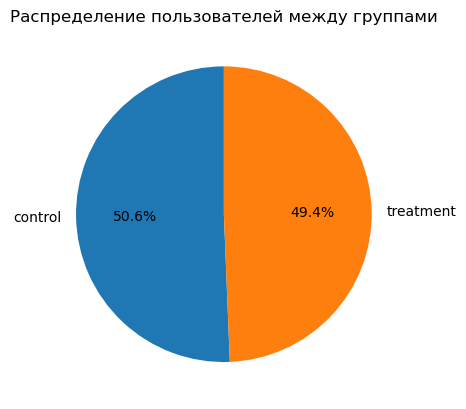

Пересечений пользователей между группами не обнаружено.


In [87]:
# Рассчитываем количество уникальных пользователей в каждой группе
users_per_group = split.groupby('group')['user_id'].nunique()

# Выводим распределение пользователей
print("Количество пользователей по группам:")
print(users_per_group)

# Рассчитываем процентную разницу
test = users_per_group.get('treatment', 0) 
control = users_per_group.get('control', 0) 
P = 100 * (abs(test - control) / test)

print(f"\nПроцентная разница в размерах групп: {P:.2f}%")

# Визуализация распределения
plt.pie(users_per_group, 
        labels=users_per_group.index, 
        autopct='%1.1f%%',
        startangle=90)
plt.title('Распределение пользователей между группами')
plt.show()

# Создаем множества пользователей из каждой группы
users_group_test = set(split[split['group'] == 'treatment']['user_id'].unique())
users_group_control = set(split[split['group'] == 'control']['user_id'].unique())

# Находим пересечение пользователей
common_users = users_group_test & users_group_control
num_common_users = len(common_users)

if num_common_users > 0:
    print(f"Обнаружено {num_common_users} пользователей, присутствующих в обеих группах:")
    print(common_users)
    
    # Выводим данные проблемных пользователей для анализа
    print("\nДанные пересекающихся пользователей:")
    display(split[split['user_id'].isin(common_users)].sort_values('user_id'))
else:
    print("Пересечений пользователей между группами не обнаружено.")

**Промежуточный вывод:**

Размеры групп почти равны — разница 2.59%, что допустимо для A/B-теста и не требует коррекции. Отсутствие пересечений — хороший признак чистоты сплита. Группы сбалансированы, можно переходить к анализу метрик.

In [89]:
# Объединяем данные
users_ab = pd.merge(
    users,
    split,
    on='user_id',
    how='left'
)

# Рассчитываем выручку как 5% от total_price
orders['revenue'] = orders['total_price'] * 0.05

# Находим первую покупку для каждого пользователя
first_purchase = orders.sort_values('order_date').groupby('user_id').first().reset_index()
first_purchase['made_purchase'] = 1

# Объединяем с информацией о группе
users_with_purchase = pd.merge(
    users_ab,
    first_purchase[['user_id', 'made_purchase', 'order_date', 'revenue']],
    on='user_id',
    how='left'
)

users_with_purchase['made_purchase'] = users_with_purchase['made_purchase'].fillna(0)
users_with_purchase['revenue'] = users_with_purchase['revenue'].fillna(0)

# Расчет конверсии по группам
conversion_by_group = users_with_purchase.groupby('group').agg({
    'user_id': 'count',
    'made_purchase': 'sum'
}).rename(columns={'user_id': 'total_users', 'made_purchase': 'buyers'})

conversion_by_group['conversion_rate'] = conversion_by_group['buyers'] / conversion_by_group['total_users'] * 100

print("ОСНОВНАЯ МЕТРИКА: КОНВЕРСИЯ В ПЕРВУЮ ПОКУПКУ")

print(f"\nКонверсия по группам:")
print(conversion_by_group[['total_users', 'buyers', 'conversion_rate']])

# Статистическая значимость разницы
print(f"\nПроверка статистической значимости:")
control_success = conversion_by_group.loc['control', 'buyers']
control_total = conversion_by_group.loc['control', 'total_users']
treatment_success = conversion_by_group.loc['treatment', 'buyers']
treatment_total = conversion_by_group.loc['treatment', 'total_users']

# Z-тест для пропорций
z_stat, p_value = proportions_ztest(
    [control_success, treatment_success],
    [control_total, treatment_total]
)

print(f"P-value: {p_value:.6f}")

if p_value < 0.05:
    print(f"РАЗНИЦА СТАТИСТИЧЕСКИ ЗНАЧИМА (p < 0.05)")
    lift = ((treatment_success/treatment_total) / (control_success/control_total) - 1) * 100
    print(f"Разница конверсии: {lift:.2f}%")
else:
    print(f"РАЗНИЦА НЕ СТАТИСТИЧЕСКИ ЗНАЧИМА (p ≥ 0.05)")

ОСНОВНАЯ МЕТРИКА: КОНВЕРСИЯ В ПЕРВУЮ ПОКУПКУ

Конверсия по группам:
           total_users  buyers  conversion_rate
group                                          
control           1503    16.0         1.064538
treatment         1465   110.0         7.508532

Проверка статистической значимости:
P-value: 0.000000
РАЗНИЦА СТАТИСТИЧЕСКИ ЗНАЧИМА (p < 0.05)
Разница конверсии: 605.33%


**Промежуточный вывод:**

Конверсия в тестовой группе (7.51%) значительно превышает контрольную (1.06%). Разница статистически высоко значима (p ≈ 0), что подтверждает гипотезу: бонус на первую покупку существенно повышает конверсию среди пользователей TikTok.

Однако важно учитывать, что абсолютное число покупателей крайне мало: всего 16 в контрольной и 110 в тестовой группе. При таких объемах даже небольшие колебания (например, 5–10 дополнительных покупок) могут сильно влиять на оценку эффекта. Это повышает риск нестабильности результата и снижает уверенность в обобщении вывода на более широкую аудиторию.

Таким образом, несмотря на высокую статистическую значимость, эффект может быть переоценён из-за малого числа событий. Рекомендуется продлить эксперимент или провести повторный тест с большей выборкой, чтобы подтвердить устойчивость результата.

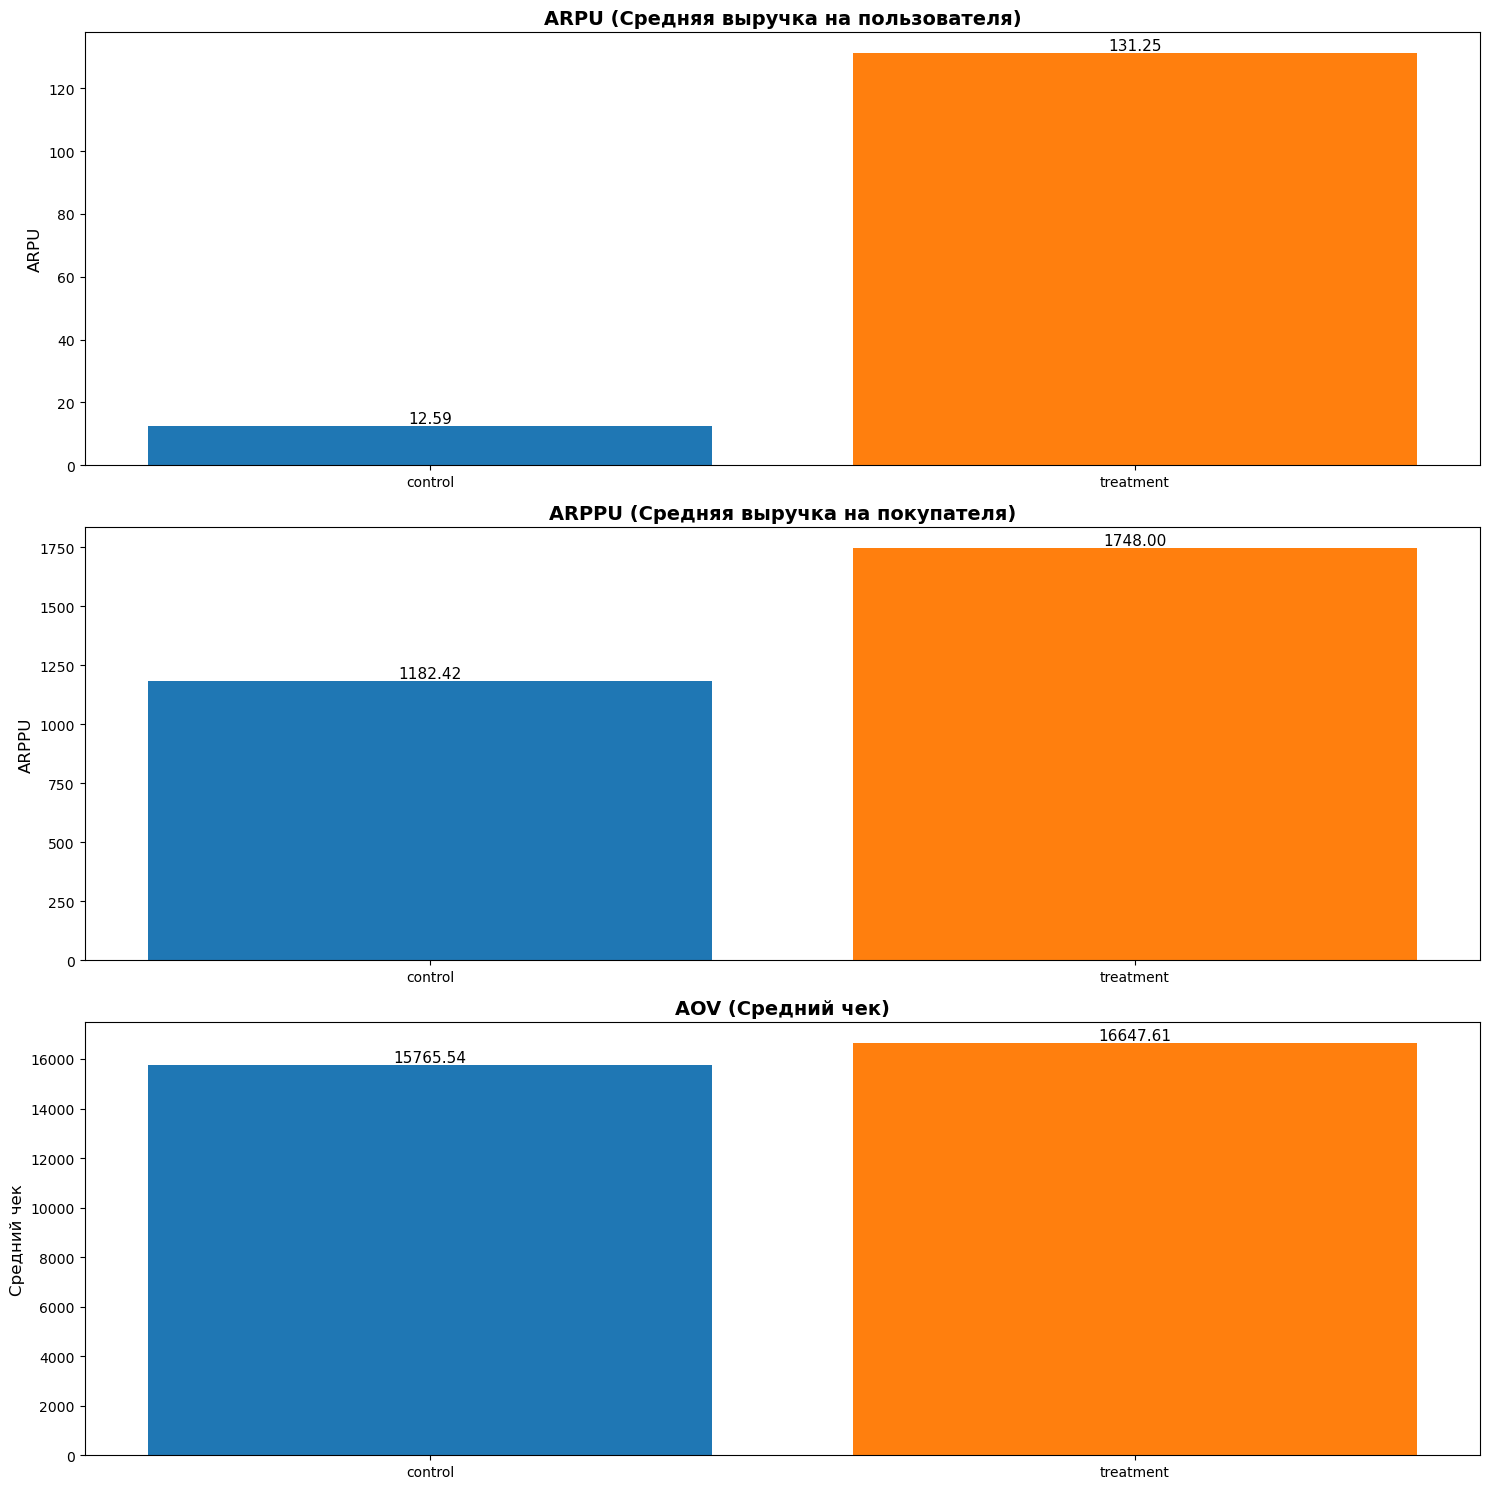


1. ARPU (Средняя выручка на пользователя):
   Контроль: 12.59
   Тест: 131.25
   Разница: 118.66
   P-value: 0.000000
   СТАТИСТИЧЕСКИ ЗНАЧИМА (p < 0.05)

2. ARPPU (Средняя выручка на покупателя):
   Контроль: 1182.42
   Тест: 1748.00
   Разница: 565.58
   P-value: 0.049277
   СТАТИСТИЧЕСКИ ЗНАЧИМА (p < 0.05)

3. AOV (Средний чек):
   Контроль: 15765.54
   Тест: 16647.61
   Разница: 882.07
   P-value: 0.787204
   НЕ СТАТИСТИЧЕСКИ ЗНАЧИМА (p ≥ 0.05)


In [91]:
# Общая выручка по пользователям
user_total_revenue = orders.groupby('user_id')['revenue'].sum().reset_index()

# Объединяем с информацией о группе и покупках
users_metrics = pd.merge(
    users_with_purchase[['user_id', 'group', 'made_purchase']],
    user_total_revenue,
    on='user_id',
    how='left'
)

users_metrics['revenue'] = users_metrics['revenue'].fillna(0)

# Расчет метрик по группам
metrics_by_group = users_metrics.groupby('group').agg({
    'user_id': 'count',
    'made_purchase': 'sum',
    'revenue': 'sum'
}).rename(columns={
    'user_id': 'total_users',
    'made_purchase': 'buyers',
    'revenue': 'total_revenue'
})

# ARPU
metrics_by_group['ARPU'] = metrics_by_group['total_revenue'] / metrics_by_group['total_users']

# ARPPU
metrics_by_group['ARPPU'] = metrics_by_group['total_revenue'] / metrics_by_group['buyers']

# Средний чек (AOV) - используем total_price из orders
buyers_orders = orders[orders['user_id'].isin(users_metrics[users_metrics['made_purchase'] == 1]['user_id'])]
buyers_orders_with_group = pd.merge(
    buyers_orders,
    users_metrics[['user_id', 'group']],
    on='user_id',
    how='left'
)

aov_by_group = buyers_orders_with_group.groupby('group')['total_price'].mean().reset_index()
aov_by_group = aov_by_group.rename(columns={'total_price': 'AOV'})

# Объединяем все метрики
all_metrics = pd.merge(
    metrics_by_group.reset_index(),
    aov_by_group,
    on='group',
    how='left'
)

# Визуализация метрик
fig, axes = plt.subplots(3, 1, figsize=(15, 15))

# Определяем группы
groups = ['control', 'treatment']

# 1. ARPU
ax1 = axes[0]
arpu_values = [all_metrics[all_metrics['group'] == 'control']['ARPU'].iloc[0], 
               all_metrics[all_metrics['group'] == 'treatment']['ARPU'].iloc[0]]
bars1 = ax1.bar(groups, arpu_values, color=['#1f77b4', '#ff7f0e'])  # ← Исправлено: ax1.bar
ax1.set_title('ARPU (Средняя выручка на пользователя)', fontsize=14, fontweight='bold')
ax1.set_ylabel('ARPU', fontsize=12)
for bar, value in zip(bars1, arpu_values):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{value:.2f}', ha='center', va='bottom', fontsize=11)

# 2. ARPPU
ax2 = axes[1]
arppu_values = [all_metrics[all_metrics['group'] == 'control']['ARPPU'].iloc[0], 
                all_metrics[all_metrics['group'] == 'treatment']['ARPPU'].iloc[0]]
bars2 = ax2.bar(groups, arppu_values, color=['#1f77b4', '#ff7f0e'])
ax2.set_title('ARPPU (Средняя выручка на покупателя)', fontsize=14, fontweight='bold')
ax2.set_ylabel('ARPPU', fontsize=12)
for bar, value in zip(bars2, arppu_values):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
             f'{value:.2f}', ha='center', va='bottom', fontsize=11)

# 3. AOV
ax3 = axes[2]
aov_values = [all_metrics[all_metrics['group'] == 'control']['AOV'].iloc[0], 
              all_metrics[all_metrics['group'] == 'treatment']['AOV'].iloc[0]]
bars3 = ax3.bar(groups, aov_values, color=['#1f77b4', '#ff7f0e'])
ax3.set_title('AOV (Средний чек)', fontsize=14, fontweight='bold')
ax3.set_ylabel('Средний чек', fontsize=12)
for bar, value in zip(bars3, aov_values):
    ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
             f'{value:.2f}', ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()

# 1. Статистическая значимость для ARPU
print("\n1. ARPU (Средняя выручка на пользователя):")
control_arpu = users_metrics[users_metrics['group'] == 'control']['revenue']
treatment_arpu = users_metrics[users_metrics['group'] == 'treatment']['revenue']

arpu_t_stat, arpu_p_value = ztest(control_arpu, treatment_arpu, value=0)

print(f"   Контроль: {all_metrics[all_metrics['group'] == 'control']['ARPU'].iloc[0]:.2f}")
print(f"   Тест: {all_metrics[all_metrics['group'] == 'treatment']['ARPU'].iloc[0]:.2f}")
print(f"   Разница: {all_metrics[all_metrics['group'] == 'treatment']['ARPU'].iloc[0] - all_metrics[all_metrics['group'] == 'control']['ARPU'].iloc[0]:.2f}")
print(f"   P-value: {arpu_p_value:.6f}")
if arpu_p_value < 0.05:
    print(f"   СТАТИСТИЧЕСКИ ЗНАЧИМА (p < 0.05)")
else:
    print(f"   НЕ СТАТИСТИЧЕСКИ ЗНАЧИМА (p ≥ 0.05)")

# 2. Статистическая значимость для ARPPU
print("\n2. ARPPU (Средняя выручка на покупателя):")
control_arppu_data = users_metrics[(users_metrics['group'] == 'control') & (users_metrics['made_purchase'] == 1)]['revenue']
treatment_arppu_data = users_metrics[(users_metrics['group'] == 'treatment') & (users_metrics['made_purchase'] == 1)]['revenue']

if len(control_arppu_data) > 1 and len(treatment_arppu_data) > 1:
    arppu_t_stat, arppu_p_value = ttest_ind(control_arppu_data, treatment_arppu_data, equal_var=False)
else:
    arppu_t_stat, arppu_p_value = np.nan, np.nan

print(f"   Контроль: {all_metrics[all_metrics['group'] == 'control']['ARPPU'].iloc[0]:.2f}")
print(f"   Тест: {all_metrics[all_metrics['group'] == 'treatment']['ARPPU'].iloc[0]:.2f}")
print(f"   Разница: {all_metrics[all_metrics['group'] == 'treatment']['ARPPU'].iloc[0] - all_metrics[all_metrics['group'] == 'control']['ARPPU'].iloc[0]:.2f}")
if not np.isnan(arppu_t_stat):
    print(f"   P-value: {arppu_p_value:.6f}")
    if arppu_p_value < 0.05:
        print(f"   СТАТИСТИЧЕСКИ ЗНАЧИМА (p < 0.05)")
    else:
        print(f"   НЕ СТАТИСТИЧЕСКИ ЗНАЧИМА (p ≥ 0.05)")
else:
    print(f"   Недостаточно данных для статистического теста")

# 3. Статистическая значимость для AOV
print("\n3. AOV (Средний чек):")
control_aov_data = buyers_orders_with_group[buyers_orders_with_group['group'] == 'control']['total_price']
treatment_aov_data = buyers_orders_with_group[buyers_orders_with_group['group'] == 'treatment']['total_price']

if len(control_aov_data) > 1 and len(treatment_aov_data) > 1:
    aov_t_stat, aov_p_value = ttest_ind(control_aov_data, treatment_aov_data, equal_var=False)
else:
    aov_t_stat, aov_p_value = np.nan, np.nan

print(f"   Контроль: {all_metrics[all_metrics['group'] == 'control']['AOV'].iloc[0]:.2f}")
print(f"   Тест: {all_metrics[all_metrics['group'] == 'treatment']['AOV'].iloc[0]:.2f}")
print(f"   Разница: {all_metrics[all_metrics['group'] == 'treatment']['AOV'].iloc[0] - all_metrics[all_metrics['group'] == 'control']['AOV'].iloc[0]:.2f}")
if not np.isnan(aov_t_stat):
    print(f"   P-value: {aov_p_value:.6f}")
    if aov_p_value < 0.05:
        print(f"   СТАТИСТИЧЕСКИ ЗНАЧИМА (p < 0.05)")
    else:
        print(f"   НЕ СТАТИСТИЧЕСКИ ЗНАЧИМА (p ≥ 0.05)")
else:
    print(f"   Недостаточно данных для статистического теста")

**Промежуточный вывод:**

- ARPU вырос сильно и значимо — бонус увеличивает выручку на пользователя.
- ARPPU вырос незначительно, но статистически значимо (p ≈ 0.049) — покупатели тратят больше.
- AOV не изменился (p = 0.787) — рост ARPPU, скорее всего, из-за нескольких крупных заказов или повторных покупок, а не из-за роста чека.

Но из-за малого числа покупателей (особенно в контроле — всего 16) метрики могут быть нестабильными. Выбросы легко искажают ARPPU и AOV.

In [93]:
#Барьерная метрика: общая выручка
# Уже рассчитано в метриках выше
print(f"\nОбщая выручка по группам:")
print(f"Группа control: {all_metrics[all_metrics['group'] == 'control']['total_revenue'].iloc[0]:.2f}")
print(f"Группа treatment: {all_metrics[all_metrics['group'] == 'treatment']['total_revenue'].iloc[0]:.2f}")

revenue_control = all_metrics[all_metrics['group'] == 'control']['total_revenue'].iloc[0]
revenue_treatment = all_metrics[all_metrics['group'] == 'treatment']['total_revenue'].iloc[0]
revenue_difference = revenue_treatment - revenue_control
revenue_lift = (revenue_difference / revenue_control) * 100 if revenue_control > 0 else 0

print(f"Разница: {revenue_difference:.2f}")
print(f"Разница выручки: {revenue_lift:.2f}%")

# Проверяем статистическую значимость разницы в выручке
revenue_control_group = users_metrics[users_metrics['group'] == 'control']['revenue']
revenue_treatment_group = users_metrics[users_metrics['group'] == 'treatment']['revenue']

t_stat, p_value_revenue = ztest(revenue_control_group, revenue_treatment_group, value=0)

print(f"\nСтатистическая проверка разницы в выручке:")
print(f"P-value: {p_value_revenue:.6f}")

if p_value_revenue < 0.05:
    print(f"РАЗНИЦА В ВЫРУЧКЕ СТАТИСТИЧЕСКИ ЗНАЧИМА")
else:
    print(f"РАЗНИЦА В ВЫРУЧКЕ НЕ СТАТИСТИЧЕСКИ ЗНАЧИМА")


Общая выручка по группам:
Группа control: 18918.65
Группа treatment: 192279.85
Разница: 173361.21
Разница выручки: 916.35%

Статистическая проверка разницы в выручке:
P-value: 0.000000
РАЗНИЦА В ВЫРУЧКЕ СТАТИСТИЧЕСКИ ЗНАЧИМА


**Промежуточный вывод:**

Выручка в тестовой группе выросла на 916% (p ≈ 0) — эффект сильный и значим.
Но он основан всего на 110 покупках, поэтому может быть нестабильным. Всё же, в совокупности с ростом конверсии и ARPU — бонус явно работает.

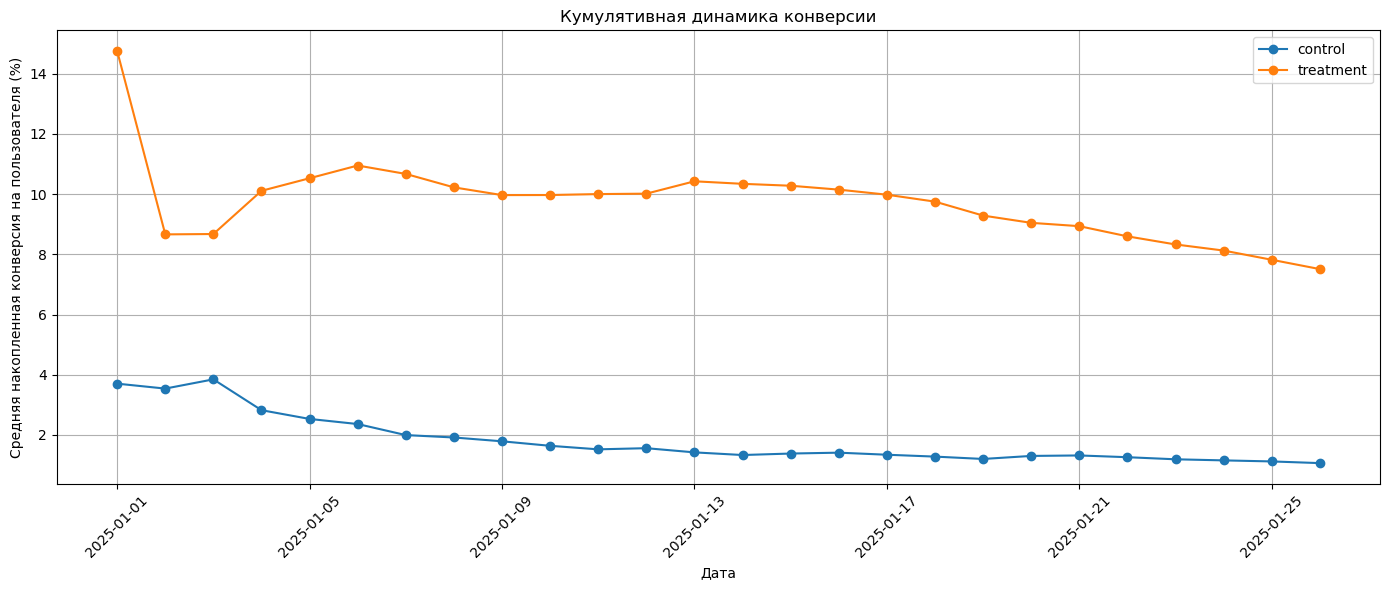

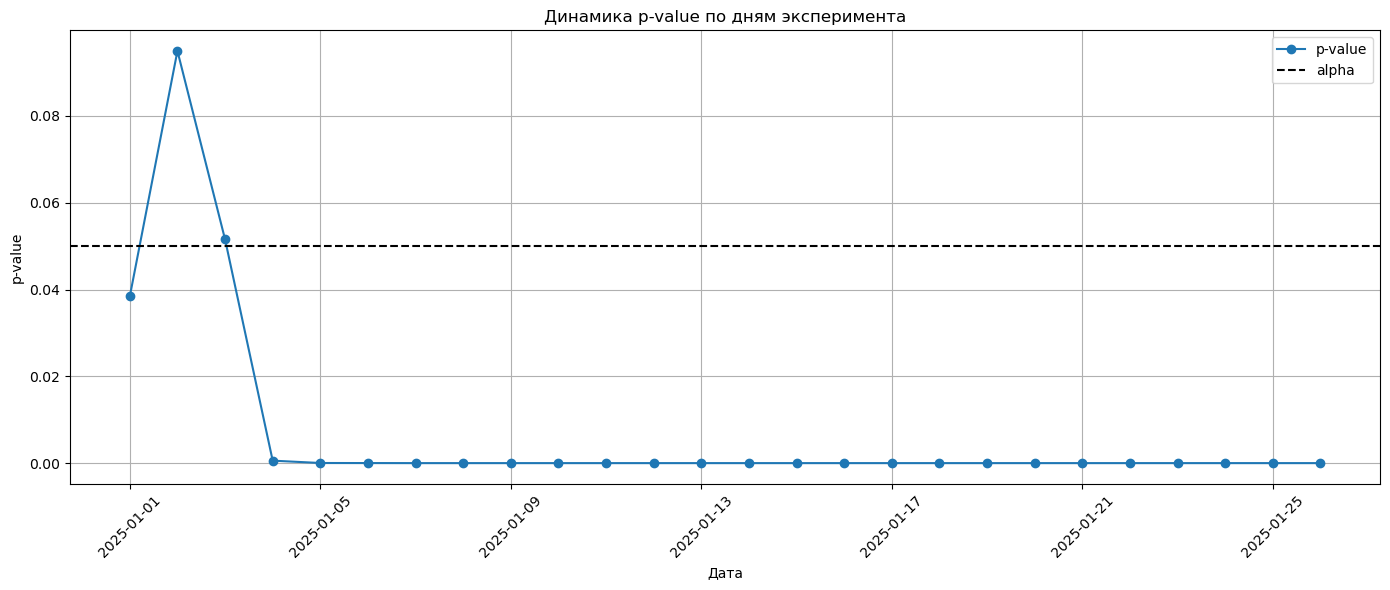

In [95]:
# Куммулятивная динамика конверсии
# Создаем таблицу с пользователями, их группой и датой регистрации
users_daily = users_ab[['user_id', 'group', 'registration_date']].copy()
users_daily['registration_day'] = users_daily['registration_date'].dt.date

# Добавляем информацию о покупках
users_with_purchase_daily = pd.merge(
    users_daily,
    first_purchase[['user_id', 'made_purchase']],
    on='user_id',
    how='left'
)

users_with_purchase_daily['made_purchase'] = users_with_purchase_daily['made_purchase'].fillna(0)

# Список всех дат
all_dates = sorted(users_with_purchase_daily['registration_day'].unique())

conv_records = []

# Кумулятивный расчёт конверсии
for day in all_dates:
    # Данные до текущей даты включительно
    data_up_to_day = users_with_purchase_daily[users_with_purchase_daily['registration_day'] <= day]

    # Кумулятивная конверсия по пользователю
    user_cum_purchase = data_up_to_day.groupby(['user_id', 'group'])['made_purchase'].max().reset_index()

    # Средняя конверсия по группе
    group_avg = user_cum_purchase.groupby('group')['made_purchase'].mean().reset_index(name='avg_conversion')
    group_avg['avg_conversion'] = group_avg['avg_conversion'] * 100  # в проценты
    group_avg['date'] = day

    conv_records.append(group_avg)

# Собираем финальный DataFrame
cumulative_conversion = pd.concat(conv_records)

# График
plt.figure(figsize=(14,6))
for grp in cumulative_conversion['group'].unique():
    subset = cumulative_conversion[cumulative_conversion['group'] == grp]
    plt.plot(subset['date'], subset['avg_conversion'], marker='o', label=grp)

plt.xlabel('Дата')
plt.ylabel('Средняя накопленная конверсия на пользователя (%)')
plt.title('Кумулятивная динамика конверсии')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Пустой список для результатов
pval_records = []

# Расчёт p-value по дням
for current_date in all_dates:
    # Все пользователи до текущей даты
    users_to_date = users_with_purchase_daily[users_with_purchase_daily['registration_day'] <= current_date]
    
    # Суммарная покупка для каждого пользователя по группам
    user_purchase = users_to_date.groupby(['user_id', 'group'])['made_purchase'].max().reset_index()

    # Объявление переменных с данными по каждой группе
    control = user_purchase[user_purchase['group'] == 'control']['made_purchase']
    treatment = user_purchase[user_purchase['group'] == 'treatment']['made_purchase']
    
    # расчет p-value
    if len(control) > 0 and len(treatment) > 0:
        p_val = stats.ttest_ind(control, treatment, equal_var=False).pvalue
    else:
        p_val = np.nan
    
    pval_records.append({
        'date': current_date,
        'p_value': p_val
    })

# Собираем в DataFrame
pvalue_df = pd.DataFrame(pval_records)

# График
plt.figure(figsize=(14,6))
plt.plot(pvalue_df['date'], pvalue_df['p_value'], marker='o', label='p-value')
plt.axhline(y=0.05, linestyle='--', color='black', label='alpha')
plt.title('Динамика p-value по дням эксперимента')
plt.xlabel('Дата')
plt.ylabel('p-value')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

**Промежуточный вывод:**

Графики динамики подтверждают надёжность результата:

- Кумулятивная конверсия в тестовой группе сразу выросла и стабильно остаётся на уровне 8–10%, в то время как в контрольной — падает до ~1%. Это говорит, что эффект не кратковременный, а устойчивый.
- P-value достиг значимости (p < 0.05) уже на 3–5 день и с тех пор остаётся практически нулевым, что исключает риск «ложного старта» или временного шума.

Таким образом, рост конверсии и выручки — не случайность, а реальный и стабильный эффект от бонуса.

**Итоговый вывод:**

Бонус на первую покупку для пользователей TikTok существенно повысил конверсию (в 7 раз), выручку на пользователя (ARPU) и общую выручку — все ключевые метрики показали статистически значимый рост. Динамика во времени подтверждает, что эффект не случайный и устойчив.

**Но есть серьёзные проблемы:**

- Очень малое число покупателей — всего 16 в контроле и 110 в тесте. Это делает результаты уязвимыми к выбросам и шуму. Например, один крупный заказ мог исказить ARPPU или AOV.
- Низкая мощность теста — из-за срочности не был рассчитан MDE и размер выборки. При таких малых числах даже «значимые» различия могут быть ложными или нестабильными при масштабировании.
- Риск переоценки эффекта — рост конверсии на 605% выглядит нереалистично высоким. Возможно, бонус был слишком щедрым, либо аудитория была не готова к покупкам без стимула — это может не работать при массовом запуске.
- Неясна причина роста ARPPU — средний чек (AOV) не изменился, значит, рост ARPPU вызван либо повторными покупками, либо выбросами. Без анализа частоты покупок или распределения чеков — выводы неполные.
  
**Рекомендации:**

- Провести повторный тест с большей выборкой (минимум 500+ покупателей в каждой группе).
- Проверить распределение чеков и частоту покупок — чтобы понять, почему растёт ARPPU без роста AOV.
- Оценить стоимость бонуса vs прибыль — возможно, эффект экономически невыгоден.

**Итог:** Эксперимент показал сильный эффект, но его нельзя принимать как окончательный из-за низкой надёжности данных. Нужно перепроверить с учётом масштаба и стабильности.